# [Data Exploring & Some Visualization]
### May 22, 2020
### Minju Jo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("FS_2y_before_Bankruptcy_train.csv")
data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,-0.024558,0.30051,0.10733,1.8368,34.382,-0.026711,-0.020067,2.2519,1.06670,0.67673,...,0.062497,-0.036289,0.9375,0.25454,13.632,3.693,69.389,5.2602,0.8826,0
1,0.639180,0.00000,1.00000,?,29.678,-1.139300,0.760520,?,1.11850,1.00000,...,0.67983,0.63918,0.32014,0.0,?,37.886,0,?,?,0
2,-0.440760,0.47723,0.19260,1.4678,34.555,0.000000,-0.440760,1.0954,1.51860,0.52277,...,-0.29059,-0.84313,1.2871,0.12538,?,2.5649,98.95,3.6887,3.8376,0
3,0.119520,0.17679,0.63546,4.5944,117.65,0.251540,0.148750,4.5826,1.12630,0.81017,...,0.11211,0.14752,0.88789,0.0,8.9302,10.287,40.355,9.0448,8.5169,0
4,0.230400,0.27095,0.23762,2.5745,-26.928,0.617540,0.282690,2.6907,0.80411,0.72905,...,0.45957,0.31602,0.6232,0.16465,7.9274,6.6605,68.502,5.3283,1.315,0


In [3]:
data.shape

(6855, 65)

In [4]:
bankrupt_num = np.sum(data["class"]==1)
bankrupt_num

361

파산한 기업은 6855개 중 361개 밖에 없다

In [5]:
data.isna().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
         ..
Attr61    0
Attr62    0
Attr63    0
Attr64    0
class     0
Length: 65, dtype: int64

In [6]:
np.sum((data.isna().sum()!=0))

0

Nan 값은 하나도 없다

?가 보이니 ? 개수를 세어봤더니 ? 값은 엄청 많다..

In [7]:
np.sum(data == "?").sort_values()[-15:]

C:\Users\MINJU\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Attr33      28
Attr47      57
Attr52      60
Attr32      72
Attr21     112
Attr41     142
Attr24     149
Attr53     162
Attr54     162
Attr28     162
Attr64     162
Attr45     418
Attr60     420
Attr27     462
Attr37    3100
dtype: int64

Attr37은 6855개 중에 3100개가 ?값인데 과연 이걸 쓸 수 있을까..? (X37 (current assets - inventories) / long-term liabilities)

In [8]:
np.sum(np.sum(data == "?"))

6132

총 6132개나 있다

In [9]:
np.sum(data == "?", axis = 1).value_counts()

0     3334
1     2577
2      413
3      223
4       85
5       78
6       41
7       39
8       15
9        9
14       7
10       6
18       4
17       4
11       4
15       3
13       3
16       2
12       2
21       2
20       1
25       1
22       1
19       1
dtype: int64

- 행별로 ? 가 있는 것끼리 상관관계를 봤더니 아예 ?가 없는 행은 3334개밖에없다.
- 그러므로 그냥 ? 있는 행을 지워서는 안 된다..
- ?가 많은 행도 있지만 딱히 엄청 상관관계가 있어 보이진 않는다.
- ?가 많은 행의 target 변수들을 비교한 후 상관관계를 보고 ?가 너무 많은 행은 그냥 없애도 되지않을까.. 숫자도 적고,, (변수가 총 64개인데 Nan 값이 25개라니,,)
- 계산 식들이니까 혹시 다른 변수들을 이용해 ? 값을 구할 방법은 없을까?

In [10]:
many_nan_data = data[np.sum(data == "?", axis = 1)>=15]
many_nan_data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
1,0.639180,0.000000,1.000000,?,29.678,-1.139300,0.760520,?,1.11850,1.00000,...,0.67983,0.63918,0.32014,0.0,?,37.886,0,?,?,0
141,-0.154180,0.001647,0.165690,101.6,1628.3,0.408540,-0.154180,606.19,0.00000,0.99835,...,?,-0.15442999999999998,?,0.0,?,0,?,0,0,0
633,-0.004334,0.562210,-0.018071,0.87135,84531,-0.005906,-0.004510,0.77871,0.00000,0.43779,...,?,0.0,0.17714,0.9633200000000001,0,0,?,0,0,0
880,0.000000,0.107350,-0.016672,0.47952,-217.74,0.024983,0.027346,8.3156,0.00000,0.89265,...,?,0.0,?,0.084372,?,0,?,0,0,0
1580,0.036402,0.000000,1.000000,?,0,0.072750,0.044946,?,0.07501,1.00000,...,-2.8239,0.036402,0.86456,0.0,0.11475,?,0,?,?,0


In [11]:
many_nan_data.shape

(19, 65)

In [12]:
np.sum(many_nan_data["class"])

1

19개 밖에 하나밖에 없는 걸 보니 ?의 개수가 그렇게 유의미하진 않은 것 같다.

In [13]:
np.sum(many_nan_data== "?").sort_values()[-15:]

C:\Users\MINJU\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Attr62    12
Attr19    12
Attr20    12
Attr56    12
Attr13    12
Attr42    12
Attr43    12
Attr30    12
Attr49    12
Attr31    12
Attr23    12
Attr39    12
Attr37    14
Attr45    16
Attr60    16
dtype: int64

얘들은 위의 결측치 순위(요 바로 밑의 것과 같음) 와는 또 다르다,,(Attr 37은 여기서도 여전히 많다)

In [14]:
np.sum(data == "?").sort_values()[-15:]

Attr33      28
Attr47      57
Attr52      60
Attr32      72
Attr21     112
Attr41     142
Attr24     149
Attr53     162
Attr54     162
Attr28     162
Attr64     162
Attr45     418
Attr60     420
Attr27     462
Attr37    3100
dtype: int64

## 변수 별 분포 보기 (변수 별로 ? 있는 값은 일단 여기선 빼고 확인)

## X1

In [15]:
x1 = data.iloc[:, 0]
x1.head()

0   -0.024558
1    0.639180
2   -0.440760
3    0.119520
4    0.230400
Name: Attr1, dtype: float64

In [16]:
np.sum(x1=="?")

0

C:\Users\MINJU\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


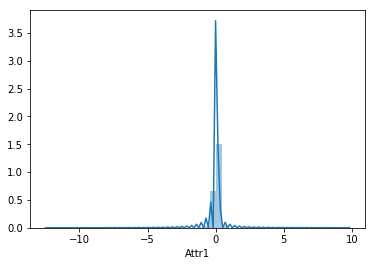

In [17]:
sns.distplot(x1)

In [18]:
print(np.min(x1)); print(np.max(x1))

-12.458
9.8037


[(-3, 3)]

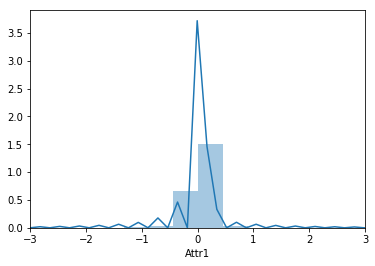

In [19]:
ax = sns.distplot(x1)
ax.set(xlim=(-3, 3))

[(-3, 3)]

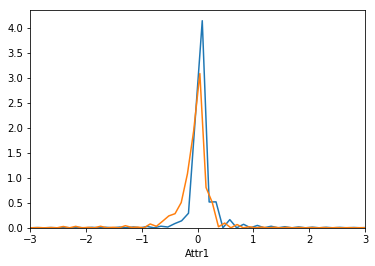

In [20]:
ax2 = sns.distplot(x1[data["class"]==0], hist = False)
ax2 = sns.distplot(x1[data["class"]==1], hist = False)
ax2.set(xlim = (-3, 3))

## X2

In [21]:
x2 = data.iloc[:, 1]
x2.head()

0    0.30051
1    0.00000
2    0.47723
3    0.17679
4    0.27095
Name: Attr2, dtype: float64

In [22]:
np.sum(x2=="?")

0

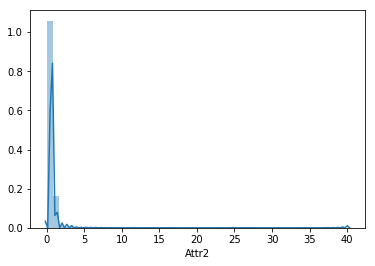

In [23]:
ax = sns.distplot(x2)

[(0, 10)]

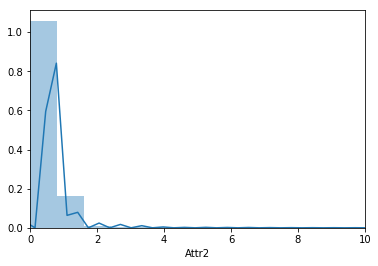

In [24]:
ax = sns.distplot(x2)
ax.set(xlim = (0,10))

log transformation 필요할듯?

[(0, 10)]

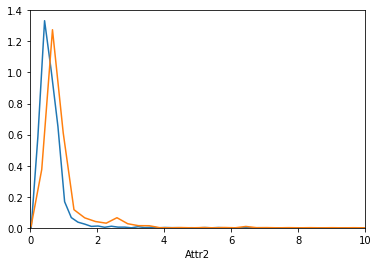

In [25]:
ax2 = sns.distplot(x2[data["class"]==0], hist = False)
ax2 = sns.distplot(x2[data["class"]==1], hist = False)
ax2.set(xlim = (0, 10))

## X3

In [26]:
x = [0]
for i in range(data.shape[1] - 1):
    x.append(data.iloc[:, i])
    
print(len(x))

65


In [27]:
np.sum(x[3]=="?")

0

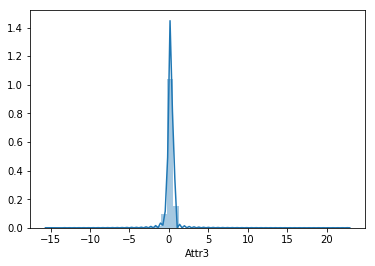

In [28]:
ax = sns.distplot(x[3])

[(-5, 5)]

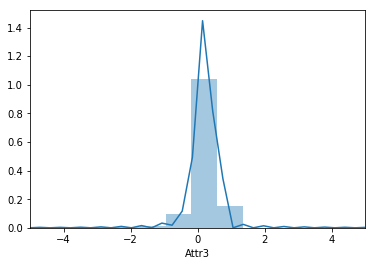

In [29]:
ax = sns.distplot(x[3])
ax.set(xlim = (-5,5))

[(-5, 5)]

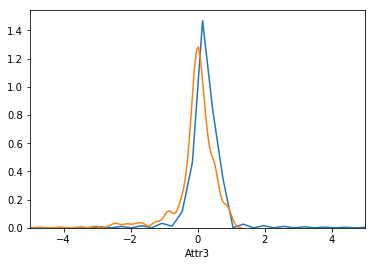

In [30]:
ax2 = sns.distplot(x[3][data["class"]==0], hist = False)
ax2 = sns.distplot(x[3][data["class"]==1], hist = False)
ax2.set(xlim = (-5,5))

## X4

In [31]:
np.sum(x[4]=="?")

28

In [32]:
new_x4 = x[4][x[4] != "?"].astype("float64")
print(len(new_x4))

6827


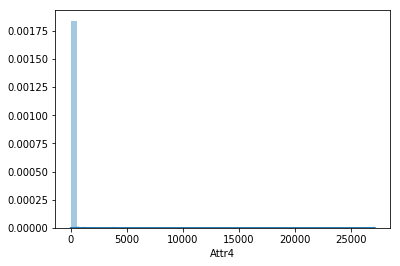

In [33]:
ax = sns.distplot(new_x4)

In [34]:
np.max(new_x4)

27146.0

In [35]:
new_x4.sort_values(ascending=False)

2099    27146.000000
1847     3848.300000
4679     1159.600000
5568      703.970000
2918      610.720000
            ...     
2758        0.023048
5051        0.021061
893         0.016855
5446        0.004717
1207       -0.045319
Name: Attr4, Length: 6827, dtype: float64

outlier일까..? 상당히 크다(27146)

In [36]:
data["class"].iloc[2099]

0

bankrupt는 아니다!

[(0, 10000)]

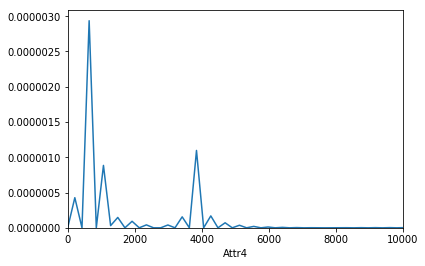

In [37]:
ax = sns.distplot(new_x4, hist=False)
ax.set(xlim = (0, 10000))

아직 무슨 값인진 모르지만 파산은 아니다!

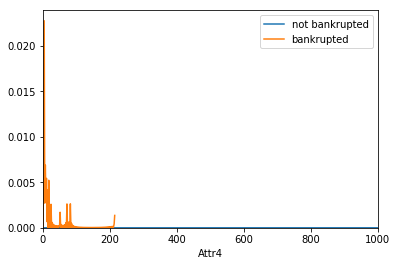

In [38]:
ax2 = sns.distplot(new_x4[data["class"]==0], hist = False, label = "not bankrupted")
ax2 = sns.distplot(new_x4[data["class"]==1], hist = False, label = "bankrupted")
ax2.set(xlim = (0, 1000))
ax2.legend()

이건 뭔가 영향력이 큰 값 일 것같기도!

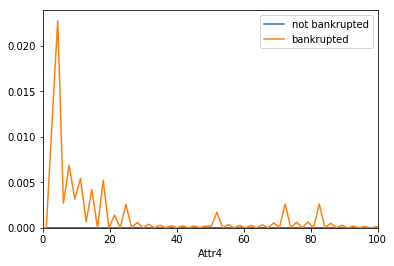

In [39]:
ax2 = sns.distplot(new_x4[data["class"]==0], hist = False, label = "not bankrupted")
ax2 = sns.distplot(new_x4[data["class"]==1], hist = False, label = "bankrupted")
ax2.set(xlim = (0, 100))
ax2.legend()

- 30 이하인 변수 중에서 각각 bankruptcy의 비율을 보자

In [40]:
new_x4_bankrupt = data["class"].iloc[list(new_x4[new_x4<=30].index)]
new_x4_bankrupt.head()

0    0
2    0
3    0
4    0
5    0
Name: class, dtype: int64

In [41]:
new_x4_bankrupt.shape

(6727,)

In [42]:
np.sum(new_x4_bankrupt)

356

In [43]:
bankrupt_num

361

- 총 파산한회사가 361개 인데, 그 중 356개나!!! X4<=30이다.
- 이정도면 그냥 outlier도 있으니 x4<=30을 기준으로 더미변수로 만들어도 될듯..?

In [44]:
np.sum(data["class"].iloc[list(new_x4[new_x4<=60].index)])

357

60까지 해서 겨우 1개 늘었다..

In [45]:
np.sum(data["class"].iloc[list(new_x4[new_x4<=10].index)])

346

10을해도 346개나 되니 적당한 수를 찾아서 하면 좋을 것 같다.

In [46]:
ratios = []
for i in range(60):
    ratio_test = data["class"].iloc[list(new_x4[new_x4<=i].index)]
    ratios.append(np.sum(ratio_test)/len(ratio_test))

In [47]:
np.argmax(ratios)

1

In [48]:
ratios[np.argmax(ratios)]

0.10704960835509138

1으로 할 때 가장 bankruptcy를 구분을 잘한다

In [49]:
one_test = data["class"].iloc[list(new_x4[new_x4<=1].index)]

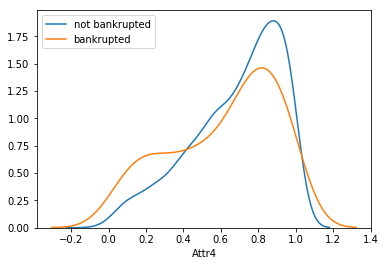

In [50]:
ax2 = sns.distplot(new_x4[new_x4<=1][data["class"]==0], hist = False, label = "not bankrupted")
ax2 = sns.distplot(new_x4[new_x4<=1][data["class"]==1], hist = False, label = "bankrupted")
ax2.legend()

그래프로 봐도 차이가 꽤 난다

In [51]:
print("Bankrupted : ", np.sum(one_test==1))
print("Not Bankrupted : ", np.sum(one_test==0))

Bankrupted :  164
Not Bankrupted :  1368


이건 다 같이 얘기해서 찾아보자!

#### --- 한번에 ? 없애기..---

In [52]:
y = x.copy() #혹시나 일단 여기에 복사해두고
len(y)

65

In [53]:
for i in range(5,len(x)):
    if (np.sum(x[i]=="?"))!=0:
        x[i] = x[i][x[i] != "?"].astype("float64")

#### --- 이제 x 데이터들은 다 ?가 없어졌다!!!! ---

## X5

In [54]:
print("Number of ? : ", np.sum(x[5]=="?"))
print("Length of the variable : ", len(x[5]))

Number of ? :  0
Length of the variable :  6840


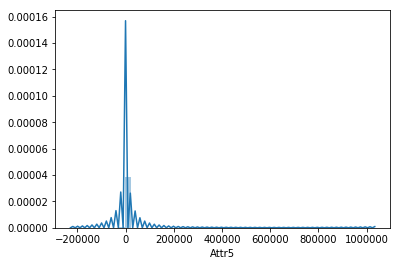

In [55]:
ax = sns.distplot(x[5])

In [56]:
np.max(x[5])

1034100.0

In [57]:
np.argmax(x[5])

3768

In [58]:
x[5].sort_values()

998     -228990.0
4132    -139260.0
4119    -119710.0
4097     -95997.0
4055     -66422.0
          ...    
633       84531.0
2607     110960.0
2866     155870.0
1411     161960.0
3774    1034100.0
Name: Attr5, Length: 6840, dtype: float64

아웃라이어들이 많다

In [59]:
data["class"][3768]

0

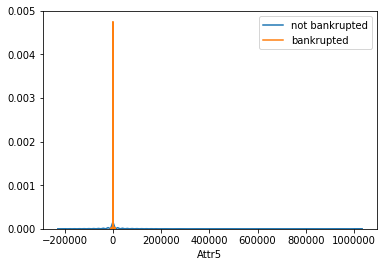

In [60]:
ax2 = sns.distplot(x[5][data["class"]==0], hist = False, label = "not bankrupted")
ax2 = sns.distplot(x[5][data["class"]==1], hist = False, label = "bankrupted")
#ax2.set(xlim = (0, 100))
ax2.legend()

얘도 뭔가 차이가 있어보인다

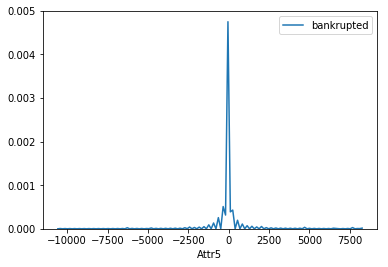

In [61]:
sns.distplot(x[5][data["class"]==1], hist = False, label = "bankrupted")

In [62]:
def find_best_i(feature_num, min, max) : 
    
    ratios = []
    for i in range(min,max):
        ratio_test = data["class"].iloc[list(x[feature_num][x[feature_num]<=i].index)]
        ratios.append(np.sum(ratio_test)/len(ratio_test))
    
    best_i = np.argmax(ratios)
    print("Best i : ", best_i+min)
    print("Best ratio : ", ratios[best_i])
    
    ax2 = sns.distplot(x[feature_num][x[feature_num]<=best_i][data["class"]==0], hist = False, label = "not bankrupted")
    ax2 = sns.distplot(x[feature_num][x[feature_num]<=best_i][data["class"]==1], hist = False, label = "bankrupted")
    ax2.legend()
    
    best_i_test = data["class"].iloc[list(x[feature_num][x[feature_num]<=best_i+min].index)]
    print("Bankrupted : ", np.sum(best_i_test==1))
    print("Not Bankrupted : ", np.sum(best_i_test==0))
    print("# of elements : ", len(best_i_test))

In [63]:
def find_best_i_abs(feature_num, min, max) : 

    ratios = []
    for i in range(min,max):
        ratio_test = data["class"].iloc[list(x[feature_num][np.abs(x[feature_num])<=i].index)]
        ratios.append(np.sum(ratio_test)/len(ratio_test))
    
    best_i = np.argmax(ratios)
    print("Best i : ", best_i+min)
    print("Best ratio : ", ratios[best_i])
    
    ax2 = sns.distplot(x[feature_num][np.abs(x[feature_num])<=best_i][data["class"]==0], hist = False, label = "not bankrupted")
    ax2 = sns.distplot(x[feature_num][np.abs(x[feature_num])<=best_i][data["class"]==1], hist = False, label = "bankrupted")
    ax2.legend()
    
    best_i_test = data["class"].iloc[list(x[feature_num][np.abs(x[feature_num])<=best_i+min].index)]
    print("Bankrupted : ", np.sum(best_i_test==1))
    print("Not Bankrupted : ", np.sum(best_i_test==0))
    print("# of elements : ", len(best_i_test))

Best i :  187
Best ratio :  0.05376910911966262
Bankrupted :  306
Not Bankrupted :  5385
# of elements :  5691


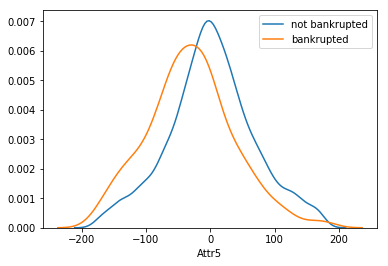

In [64]:
find_best_i_abs(5,10,1000)

## X6

In [65]:
print("Number of ? : ", np.sum(x[6]=="?"))
print("Length of the variable : ", len(x[6]))

Number of ? :  0
Length of the variable :  6855


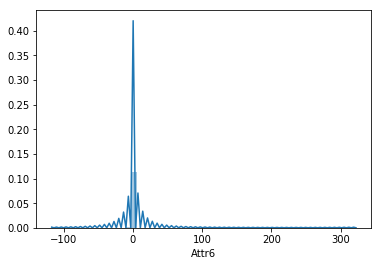

In [66]:
ax = sns.distplot(x[6])

[(-100, 100)]

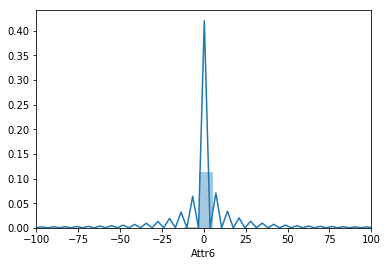

In [67]:
ax = sns.distplot(x[6])
ax.set(xlim = (-100,100))

In [68]:
x[6].sort_values()

3133   -117.4200
1070    -77.3990
3413    -53.8020
5313    -46.8730
1756    -39.8030
          ...   
1473      3.9822
3952     39.1460
6415    137.0500
1085    244.3100
6281    322.2000
Name: Attr6, Length: 6855, dtype: float64

In [69]:
data["class"][6281]

0

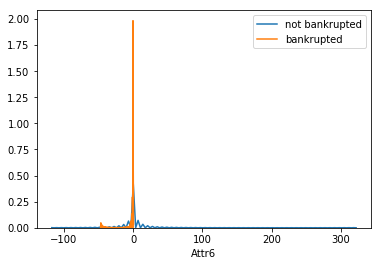

In [70]:
ax2 = sns.distplot(x[6][data["class"]==0], hist = False, label = "not bankrupted")
ax2 = sns.distplot(x[6][data["class"]==1], hist = False, label = "bankrupted")
#ax2.set(xlim = (0, 100))
ax2.legend()

In [71]:
np.sum(x[6][data["class"]==1]>0.5)

1

In [72]:
np.sum(x[6][data["class"]==1]>0.6)

0

In [73]:
x[6][data["class"]==1].sort_values()

5313   -46.87300
3823   -13.24500
6237    -6.56490
1009    -4.04320
606     -4.01950
          ...   
3086     0.22128
860      0.22371
4825     0.25191
1935     0.37975
6461     0.50370
Name: Attr6, Length: 361, dtype: float64

대부분 -7~ 0.5사이

In [74]:
np.sum((x[6][data["class"]==1]>-4.1) & (x[6][data["class"]==1]<0.504))

358

In [75]:
np.sum((x[6][data["class"]==0]>-4.1) & (x[6][data["class"]==0]<0.504))

6231

In [76]:
len(x[6][data["class"]==0])

6494

조금 거를 수 있다. 이건 구간이라서 <=가 의미 없을 수 있지만 일단 이걸로 비교해보자.

Best i :  -13
Best ratio :  0.2
Bankrupted :  2
Not Bankrupted :  8
# of elements :  10


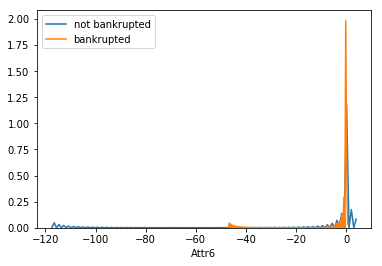

In [77]:
find_best_i(6, -20, 5)

이렇게 해도 꽤 구분할 수 있다..! (0.2나!) 하지만 해당되는 변수 개수가 10개밖에 없다는 거.. ㅠㅠ

## X7

In [78]:
print("Number of ? : ", np.sum(x[7]=="?"))
print("Length of the variable : ", len(x[7]))

Number of ? :  0
Length of the variable :  6855


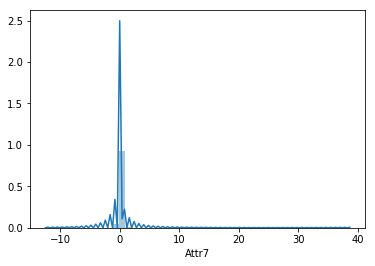

In [79]:
ax = sns.distplot(x[7])

[(-10, 10)]

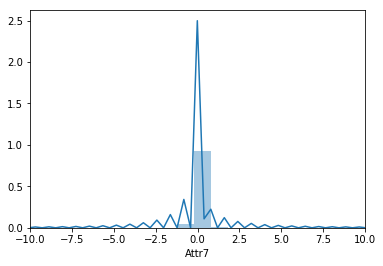

In [80]:
ax = sns.distplot(x[7])
ax.set(xlim = (-10,10))

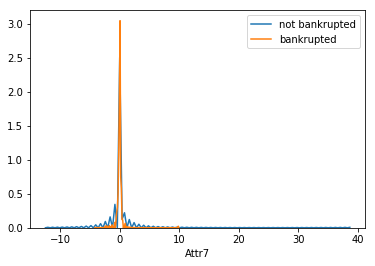

In [81]:
ax2 = sns.distplot(x[7][data["class"]==0], hist = False, label = "not bankrupted")
ax2 = sns.distplot(x[7][data["class"]==1], hist = False, label = "bankrupted")
#ax2.set(xlim = (0, 100))
ax2.legend()

Best i :  5
Best ratio :  0.05253940455341506
Bankrupted :  360
Not Bankrupted :  6492
# of elements :  6852


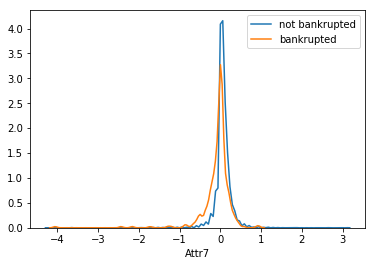

In [82]:
find_best_i_abs(7, 0, 10)

## X8

In [83]:
print("Number of ? : ", np.sum(x[8]=="?"))
print("Length of the variable : ", len(x[8]))

Number of ? :  0
Length of the variable :  6840


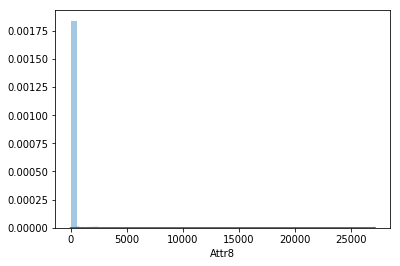

In [84]:
ax = sns.distplot(x[8])

In [85]:
x[8].sort_values()

5313       -0.97506
5416       -0.96001
5935       -0.93935
3413       -0.93638
2282       -0.93475
           ...     
1847     2257.70000
3605     2419.20000
6369     6941.00000
4679    19571.00000
2099    27145.00000
Name: Attr8, Length: 6840, dtype: float64

In [86]:
new_x4.sort_values(ascending=False)

2099    27146.000000
1847     3848.300000
4679     1159.600000
5568      703.970000
2918      610.720000
            ...     
2758        0.023048
5051        0.021061
893         0.016855
5446        0.004717
1207       -0.045319
Name: Attr4, Length: 6827, dtype: float64

여기서도 2099의 값이 엄청 컸었는데 x[8]에서도 그렇다. 두 변수가 무슨 관계인지는 몰라도 상관관계가 있을 수도 있지않을까..?

In [87]:
test_data = data[["Attr4", "Attr8"]][(data["Attr4"]!="?") & (data["Attr8"]!="?")].astype("float64")
test_data.head()

,Attr4,Attr8
0,1.8368,2.2519
2,1.4678,1.0954
3,4.5944,4.5826
4,2.5745,2.6907
5,1.0406,1.1272


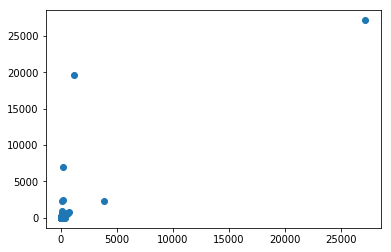

In [88]:
plt.scatter(test_data["Attr4"],test_data["Attr8"])

In [89]:
new_test_data = test_data[(test_data["Attr4"]<=5000) & (test_data["Attr8"]<=5000)].astype("float64")
new_test_data.head()

,Attr4,Attr8
0,1.8368,2.2519
2,1.4678,1.0954
3,4.5944,4.5826
4,2.5745,2.6907
5,1.0406,1.1272


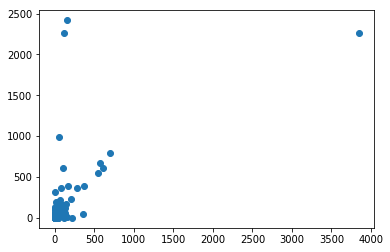

In [90]:
plt.scatter(new_test_data["Attr4"],new_test_data["Attr8"])

In [91]:
test_data.corr()

,Attr4,Attr8
Attr4,1.000000,0.815085
Attr8,0.815085,1.000000


그냥 상당히 높다!

C:\Users\MINJU\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


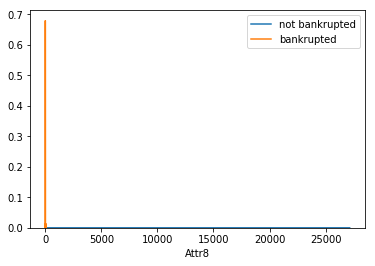

In [92]:
ax2 = sns.distplot(x[8][data["class"]==0], hist = False, label = "not bankrupted")
ax2 = sns.distplot(x[8][data["class"]==1], hist = False, label = "bankrupted")
#ax2.set(xlim = (0, 100))
ax2.legend()

Best i :  0
Best ratio :  0.14527845036319612
Bankrupted :  60
Not Bankrupted :  353
# of elements :  413


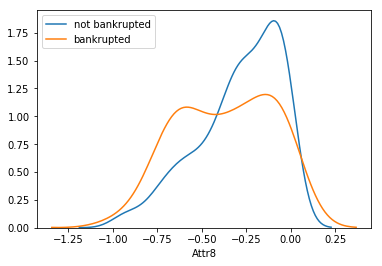

In [93]:
find_best_i(8, 0, 10)

## X9

In [94]:
print("Number of ? : ", np.sum(x[9]=="?"))
print("Length of the variable : ", len(x[9]))

Number of ? :  0
Length of the variable :  6855


C:\Users\MINJU\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


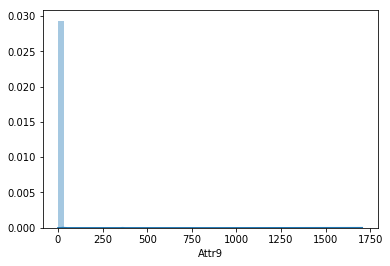

In [95]:
ax = sns.distplot(x[9])

In [96]:
x[9].sort_values()

6377      -0.032371
1593      -0.000014
5072       0.000000
880        0.000000
6369       0.000000
           ...     
3413      31.135000
2333      33.162000
6666      96.058000
1411     359.940000
4994    1704.800000
Name: Attr9, Length: 6855, dtype: float64

[(0, 40)]

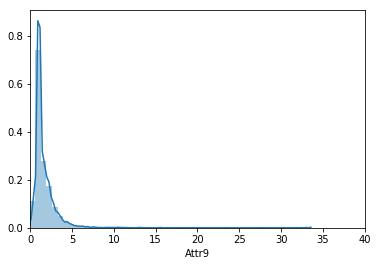

In [97]:
ax = sns.distplot(x[9][x[9]<=40])
ax.set(xlim = (0,40))

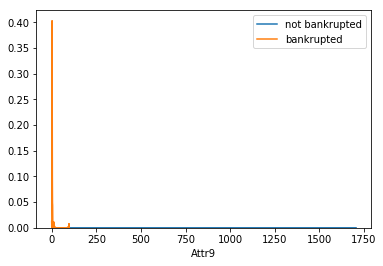

In [98]:
ax2 = sns.distplot(x[9][data["class"]==0], hist = False, label = "not bankrupted")
ax2 = sns.distplot(x[9][data["class"]==1], hist = False, label = "bankrupted")
#ax2.set(xlim = (0, 100))
ax2.legend()

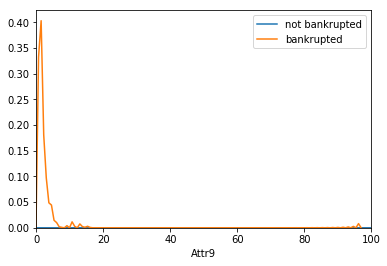

In [99]:
ax2 = sns.distplot(x[9][data["class"]==0], hist = False, label = "not bankrupted")
ax2 = sns.distplot(x[9][data["class"]==1], hist = False, label = "bankrupted")
ax2.set(xlim = (0, 100))
ax2.legend()

Best i :  1
Best ratio :  0.07939508506616257
Bankrupted :  126
Not Bankrupted :  1461
# of elements :  1587


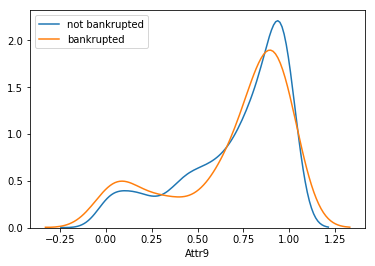

In [100]:
find_best_i(9, 0, 20)

In [101]:
test_data = data[["Attr4", "Attr8", "Attr9"]][(data["Attr4"]!="?") & (data["Attr8"]!="?") & (data["Attr9"]!="?")].astype("float64")

In [102]:
test_data.corr()

,Attr4,Attr8,Attr9
Attr4,1.000000,0.815085,-0.000496
Attr8,0.815085,1.000000,-0.002295
Attr9,-0.000496,-0.002295,1.000000


얘는 상관관계 별로 없넹,,

## X10

In [103]:
print("Number of ? : ", np.sum(x[10]=="?"))
print("Length of the variable : ", len(x[10]))

Number of ? :  0
Length of the variable :  6855


C:\Users\MINJU\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


C:\Users\MINJU\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


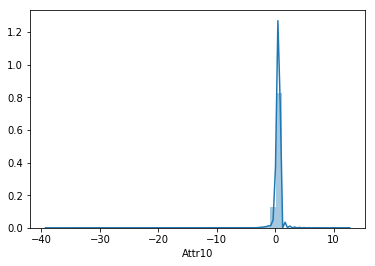

In [104]:
ax = sns.distplot(x[10])

[(-10, 10)]

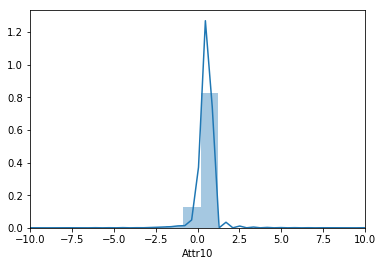

In [105]:
ax = sns.distplot(x[10])
ax.set(xlim = (-10, 10))

In [106]:
x[10].sort_values()

5313   -39.1560
5416   -24.0050
5935   -15.4870
3413   -14.7180
2282   -14.3260
         ...   
3074     1.5770
6377     1.8286
4849     2.3260
5381     9.7778
2586    12.6020
Name: Attr10, Length: 6855, dtype: float64

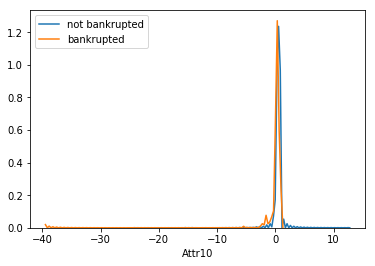

In [107]:
ax2 = sns.distplot(x[10][data["class"]==0], hist = False, label = "not bankrupted")
ax2 = sns.distplot(x[10][data["class"]==1], hist = False, label = "bankrupted")
#ax2.set(xlim = (0, 100))
ax2.legend()

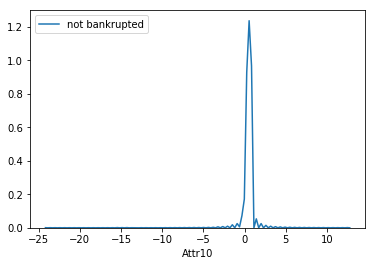

In [108]:
ax2 = sns.distplot(x[10][data["class"]==0], hist = False, label = "not bankrupted")

Best i :  0
Best ratio :  0.14527845036319612
Bankrupted :  60
Not Bankrupted :  353
# of elements :  413


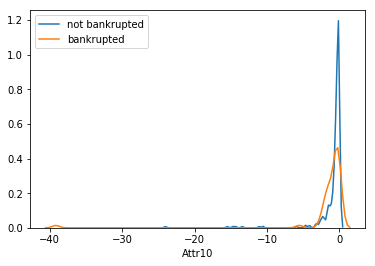

In [109]:
find_best_i(10, 0, 5)

Best i :  6
Best ratio :  0.052593133674214754
Bankrupted :  360
Not Bankrupted :  6485
# of elements :  6845


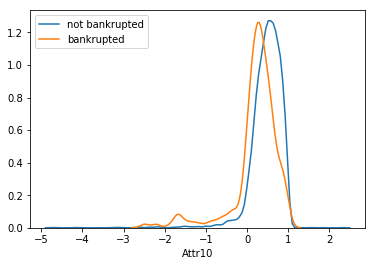

In [110]:
find_best_i_abs(10, 1, 11)

## X11

In [111]:
print("Number of ? : ", np.sum(x[11]=="?"))
print("Length of the variable : ", len(x[11]))

Number of ? :  0
Length of the variable :  6855


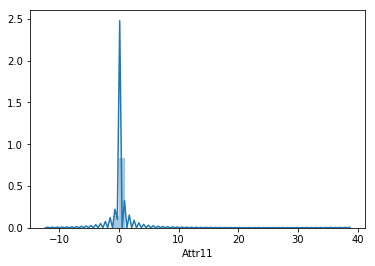

In [112]:
ax = sns.distplot(x[11])

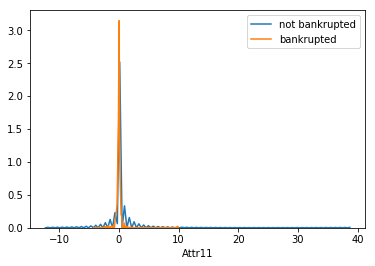

In [113]:
ax2 = sns.distplot(x[11][data["class"]==0], hist = False, label = "not bankrupted")
ax2 = sns.distplot(x[11][data["class"]==1], hist = False, label = "bankrupted")
#ax2.set(xlim = (0, 100))
ax2.legend()

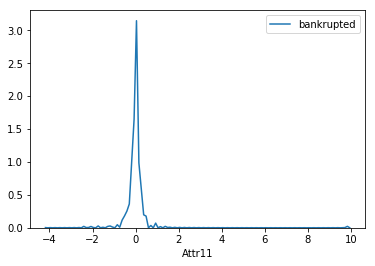

In [114]:
ax2 = sns.distplot(x[11][data["class"]==1], hist = False, label = "bankrupted")

Best i :  10
Best ratio :  0.052677659419232456
Bankrupted :  361
Not Bankrupted :  6492
# of elements :  6853


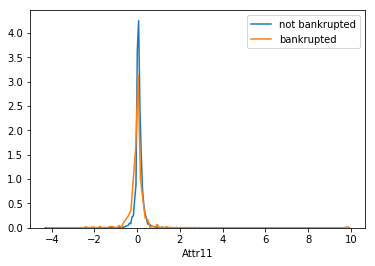

In [115]:
find_best_i_abs(11, 0, 40)

Best i :  0
Best ratio :  0.10968660968660969
Bankrupted :  154
Not Bankrupted :  1250
# of elements :  1404


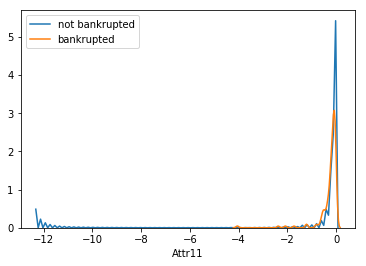

In [116]:
find_best_i(11, 0, 15)

## X12

In [117]:
print("Number of ? : ", np.sum(x[12]=="?"))
print("Length of the variable : ", len(x[12]))

Number of ? :  0
Length of the variable :  6827


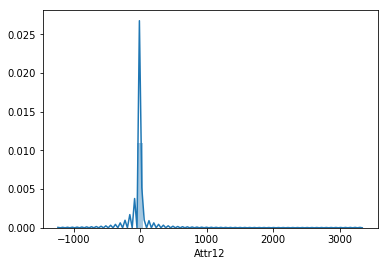

In [118]:
ax = sns.distplot(x[12])

In [119]:
x[12].sort_values()

5048   -1236.400
2654    -178.920
141      -93.616
5810     -78.100
5149     -38.265
          ...   
4372     179.400
4173     212.100
1411     342.550
2099     697.000
4679    3340.900
Name: Attr12, Length: 6827, dtype: float64

4679 쟤는 x4, x8에도 출몰했었다

In [120]:
test_data = data[["Attr4", "Attr8", "Attr12"]][(data["Attr4"]!="?") & (data["Attr8"]!="?") & (data["Attr12"]!="?")].astype("float64")

In [121]:
test_data.head()

,Attr4,Attr8,Attr12
0,1.8368,2.2519,-0.15646
2,1.4678,1.0954,-1.07060
3,4.5944,4.5826,0.84137
4,2.5745,2.6907,1.87320
5,1.0406,1.1272,0.32859


In [122]:
test_data.corr()

,Attr4,Attr8,Attr12
Attr4,1.000000,0.815085,0.226551
Attr8,0.815085,1.000000,0.672617
Attr12,0.226551,0.672617,1.000000


8이랑 12랑 꽤 연관성이 있어보인다

C:\Users\MINJU\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


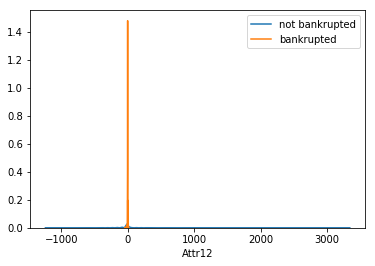

In [123]:
ax2 = sns.distplot(x[12][data["class"]==0], hist = False, label = "not bankrupted")
ax2 = sns.distplot(x[12][data["class"]==1], hist = False, label = "bankrupted")
#ax2.set(xlim = (0, 100))
ax2.legend()

Best i :  1
Best ratio :  0.05579773321708806
Bankrupted :  320
Not Bankrupted :  5415
# of elements :  5735


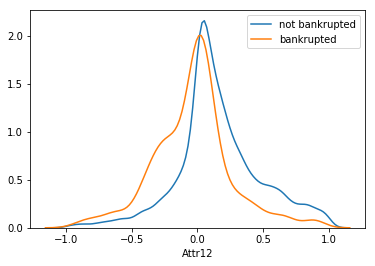

In [124]:
find_best_i_abs(12, 0, 100)

## X13

In [125]:
print("Number of ? : ", np.sum(x[13]=="?"))
print("Length of the variable : ", len(x[13]))

Number of ? :  0
Length of the variable :  6841


C:\Users\MINJU\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


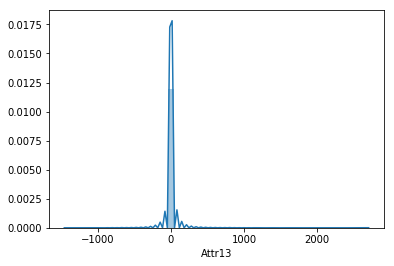

In [126]:
ax = sns.distplot(x[13])

In [127]:
x[13].sort_values()

2555   -1460.600
5935    -788.110
5810    -668.150
3794     -67.739
1108     -63.534
          ...   
3627      27.356
6494     308.500
5304     508.020
1458     804.400
6817    2707.700
Name: Attr13, Length: 6841, dtype: float64

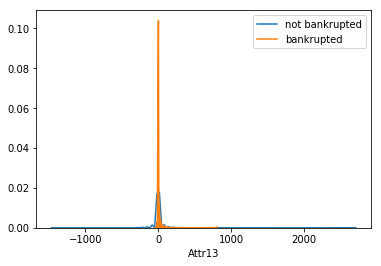

In [128]:
ax2 = sns.distplot(x[13][data["class"]==0], hist = False, label = "not bankrupted")
ax2 = sns.distplot(x[13][data["class"]==1], hist = False, label = "bankrupted")
#ax2.set(xlim = (0, 100))
ax2.legend()

Best i :  0
Best ratio :  0.1421933085501859
Bankrupted :  153
Not Bankrupted :  923
# of elements :  1076


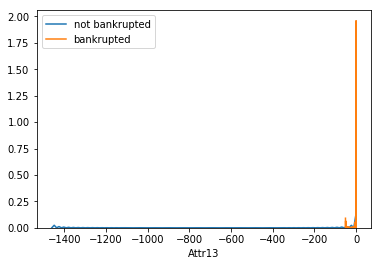

In [129]:
find_best_i(13, 0, 100)

Best i :  51
Best ratio :  0.05256222547584188
Bankrupted :  359
Not Bankrupted :  6471
# of elements :  6830


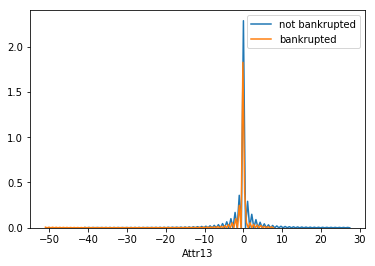

In [130]:
find_best_i_abs(13, 0, 100)

## X14

In [131]:
print("Number of ? : ", np.sum(x[14]=="?"))
print("Length of the variable : ", len(x[14]))

Number of ? :  0
Length of the variable :  6855


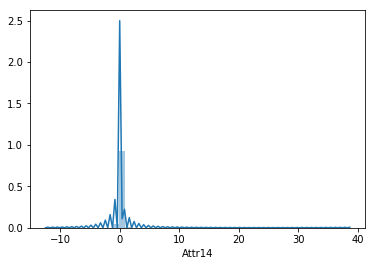

In [132]:
ax = sns.distplot(x[14])

In [133]:
x[14].sort_values()

423    -12.4580
3802    -4.2407
3823    -4.0506
2333    -3.6424
727     -2.4365
         ...   
2150     2.6476
5652     2.9771
3982     3.1233
503      9.8037
4994    38.6180
Name: Attr14, Length: 6855, dtype: float64

이 4994는 x9에서도 젤 값이 컸다

In [134]:
test_data = data[["Attr9", "Attr14"]][(data["Attr9"]!="?") & (data["Attr14"]!="?")].astype("float64")

In [135]:
test_data.head()

,Attr9,Attr14
0,1.06670,-0.020067
1,1.11850,0.760520
2,1.51860,-0.440760
3,1.12630,0.148750
4,0.80411,0.282690


In [136]:
test_data.corr()

,Attr9,Attr14
Attr9,1.000000,0.822181
Attr14,0.822181,1.000000


상관관계가 상당히 높다,,

C:\Users\MINJU\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


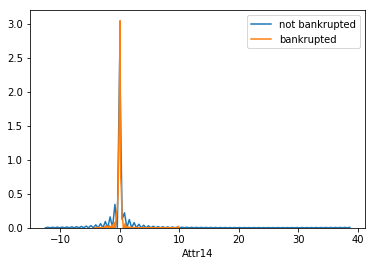

In [137]:
ax2 = sns.distplot(x[14][data["class"]==0], hist = False, label = "not bankrupted")
ax2 = sns.distplot(x[14][data["class"]==1], hist = False, label = "bankrupted")
#ax2.set(xlim = (0, 100))
ax2.legend()

Best i :  0
Best ratio :  0.11096856959589481
Bankrupted :  173
Not Bankrupted :  1386
# of elements :  1559


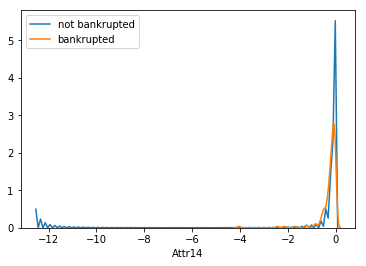

In [138]:
find_best_i(14, 0, 15)

Best i :  10
Best ratio :  0.052677659419232456
Bankrupted :  361
Not Bankrupted :  6492
# of elements :  6853


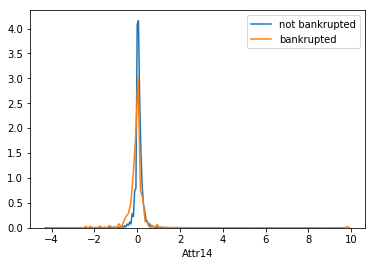

In [139]:
find_best_i_abs(14, 0, 15)

## X15

In [140]:
print("Number of ? : ", np.sum(x[15]=="?"))
print("Length of the variable : ", len(x[15]))

Number of ? :  0
Length of the variable :  6850


C:\Users\MINJU\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


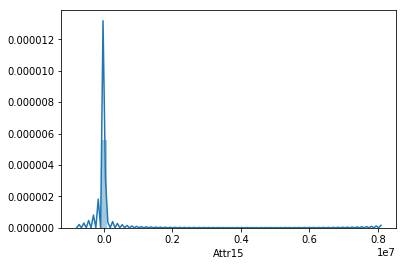

In [141]:
ax = sns.distplot(x[15])

In [142]:
x[15].sort_values()

3527    -789840.0
2976    -740260.0
4707    -683360.0
2664    -674010.0
4118    -594510.0
          ...    
780     1396200.0
4739    1421000.0
1171    2754300.0
4093    3046900.0
3250    8085500.0
Name: Attr15, Length: 6850, dtype: float64

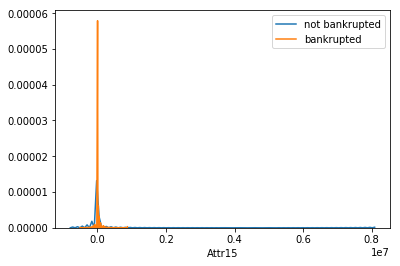

In [143]:
ax2 = sns.distplot(x[15][data["class"]==0], hist = False, label = "not bankrupted")
ax2 = sns.distplot(x[15][data["class"]==1], hist = False, label = "bankrupted")
#ax2.set(xlim = (0, 100))
ax2.legend()

Best i :  0
Best ratio :  0.14219759926131118
Bankrupted :  154
Not Bankrupted :  929
# of elements :  1083


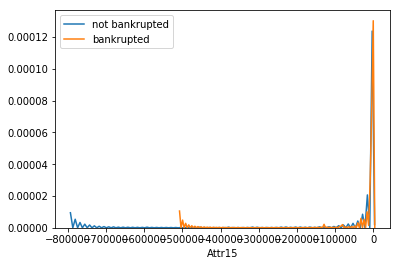

In [144]:
find_best_i(15, 0, 1000)

## X16

In [145]:
print("Number of ? : ", np.sum(x[16]=="?"))
print("Length of the variable : ", len(x[16]))

Number of ? :  0
Length of the variable :  6840


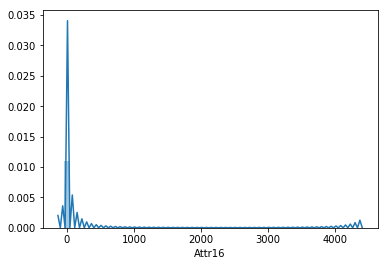

In [146]:
ax = sns.distplot(x[16])

In [147]:
x[16].sort_values()

2654    -134.890
141      -93.616
5810     -38.286
5149     -37.541
6105     -35.718
          ...   
4994     111.740
4372     179.400
4173     212.100
2099     697.000
4679    4401.300
Name: Attr16, Length: 6840, dtype: float64

4,8,12에도 출몰했던 4679,,

In [148]:
test_data = data[["Attr4", "Attr8", "Attr12","Attr16"]][
    (data["Attr4"]!="?") & (data["Attr8"]!="?") & (data["Attr12"]!="?") & (data["Attr16"]!="?")].astype("float64")

In [149]:
test_data.head()

,Attr4,Attr8,Attr12,Attr16
0,1.8368,2.2519,-0.15646,0.057548
2,1.4678,1.0954,-1.07060,-0.766050
3,4.5944,4.5826,0.84137,1.189400
4,2.5745,2.6907,1.87320,1.157900
5,1.0406,1.1272,0.32859,0.371740


In [150]:
test_data.corr()

,Attr4,Attr8,Attr12,Attr16
Attr4,1.000000,0.815085,0.226551,0.195901
Attr8,0.815085,1.000000,0.672617,0.686815
Attr12,0.226551,0.672617,1.000000,0.934771
Attr16,0.195901,0.686815,0.934771,1.000000


12와 16은,, 엄청난 상관관계당,,, (8이랑도 꽤 크다)

C:\Users\MINJU\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


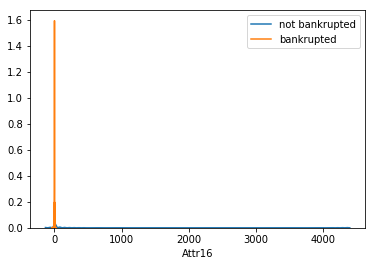

In [151]:
ax2 = sns.distplot(x[16][data["class"]==0], hist = False, label = "not bankrupted")
ax2 = sns.distplot(x[16][data["class"]==1], hist = False, label = "bankrupted")
#ax2.set(xlim = (0, 100))
ax2.legend()

Best i :  0
Best ratio :  0.1435228331780056
Bankrupted :  154
Not Bankrupted :  919
# of elements :  1073


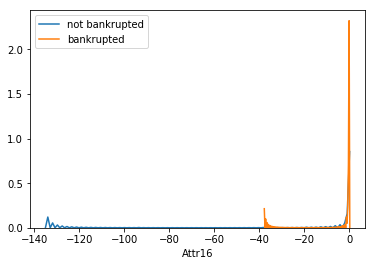

In [152]:
find_best_i(16, 0 , 20)

## X17

In [153]:
print("Number of ? : ", np.sum(x[17]=="?"))
print("Length of the variable : ", len(x[17]))

Number of ? :  0
Length of the variable :  6840


C:\Users\MINJU\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


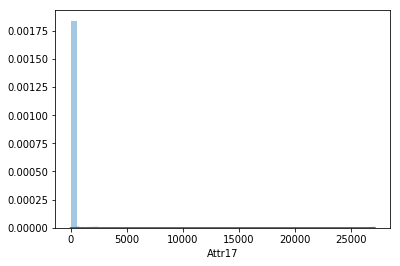

In [154]:
ax = sns.distplot(x[17])

In [155]:
x[17].sort_values()

6817        0.000857
5313        0.024902
5416        0.039993
5935        0.060653
3413        0.063620
            ...     
1847     2258.700000
3605     2420.200000
6369     6978.800000
4679    19572.000000
2099    27146.000000
Name: Attr17, Length: 6840, dtype: float64

위와 같은 유형인듯하다..

In [156]:
test_data = data[["Attr4", "Attr8", "Attr12","Attr16", "Attr17"]][
    (data["Attr4"]!="?") & (data["Attr8"]!="?") & (data["Attr12"]!="?") 
    & (data["Attr16"]!="?")  & (data["Attr17"]!="?")].astype("float64")

In [157]:
test_data.corr()

,Attr4,Attr8,Attr12,Attr16,Attr17
Attr4,1.000000,0.815085,0.226551,0.195901,0.814915
Attr8,0.815085,1.000000,0.672617,0.686815,0.999997
Attr12,0.226551,0.672617,1.000000,0.934771,0.672496
Attr16,0.195901,0.686815,0.934771,1.000000,0.686684
Attr17,0.814915,0.999997,0.672496,0.686684,1.000000


Attr8이랑 Attr17은 이정도면 그냥 선형관계...ㅋㅋㅋㅋㅋㅋㅋㅋ 나머지도 엄청난 상관관계..

C:\Users\MINJU\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


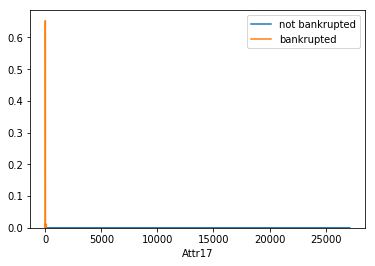

In [158]:
ax2 = sns.distplot(x[17][data["class"]==0], hist = False, label = "not bankrupted")
ax2 = sns.distplot(x[17][data["class"]==1], hist = False, label = "bankrupted")
#ax2.set(xlim = (0, 100))
ax2.legend()

C:\Users\MINJU\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\MINJU\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
No handles with labels found to put in legend.


Best i :  1
Best ratio :  0.1457286432160804
Bankrupted :  58
Not Bankrupted :  340
# of elements :  398


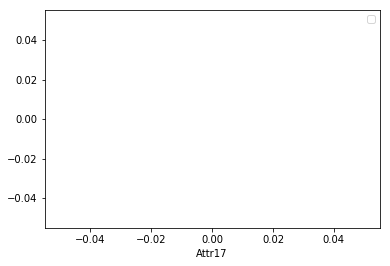

In [159]:
find_best_i(17, 1, 10)

0.1457286432160804 그냥 이것만 참고하장..

## X18

In [160]:
print("Number of ? : ", np.sum(x[18]=="?"))
print("Length of the variable : ", len(x[18]))

Number of ? :  0
Length of the variable :  6855


C:\Users\MINJU\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


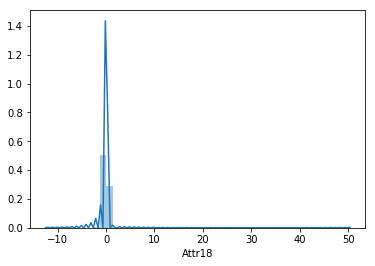

In [161]:
ax = sns.distplot(x[18])

In [162]:
x[18].sort_values()

423    -12.4580
3802    -4.2407
3823    -4.0506
2333    -3.6424
727     -2.4365
         ...   
5652     2.9771
3982     3.1233
503      9.8037
4994    38.6180
6817    50.2660
Name: Attr18, Length: 6855, dtype: float64

In [163]:
test_data = data[["Attr9", "Attr13", "Attr14", 
                  "Attr16", "Attr17", "Attr18"]][(data["Attr9"]!="?") & (data["Attr13"]!="?") & (data["Attr14"]!="?") 
                                                & (data["Attr16"]!="?") & (data["Attr17"]!="?") & (data["Attr18"]!="?")].astype("float64")

In [164]:
test_data.corr()

,Attr9,Attr13,Attr14,Attr16,Attr17,Attr18
Attr9,1.000000,-0.000234,0.825936,0.023685,-0.001953,0.553846
Attr13,-0.000234,1.000000,0.009246,0.002950,-0.000196,0.659257
Attr14,0.825936,0.009246,1.000000,0.032640,0.002850,0.672227
Attr16,0.023685,0.002950,0.032640,1.000000,0.977068,0.021673
Attr17,-0.001953,-0.000196,0.002850,0.977068,1.000000,0.001581
Attr18,0.553846,0.659257,0.672227,0.021673,0.001581,1.000000


꽤 상관관계가 높은것들이 몇 개 있다

위에것이랑 걸러진게 달라서 그런가 여기선 16과 17의 상관관계가 높다는 것을 알 수 있다.

In [165]:
test_data = data[["Attr16", "Attr17"]][(data["Attr16"]!="?") & (data["Attr17"]!="?")].astype("float64")

In [166]:
test_data.corr()

,Attr16,Attr17
Attr16,1.000000,0.686684
Attr17,0.686684,1.000000


이게 더 맞는 듯 하다

C:\Users\MINJU\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


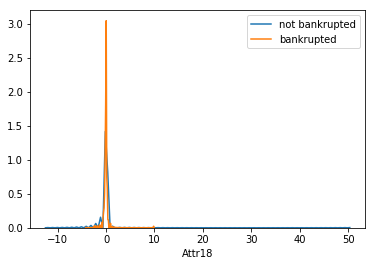

In [167]:
ax2 = sns.distplot(x[18][data["class"]==0], hist = False, label = "not bankrupted")
ax2 = sns.distplot(x[18][data["class"]==1], hist = False, label = "bankrupted")
#ax2.set(xlim = (0, 100))
ax2.legend()

Best i :  0
Best ratio :  0.11096856959589481
Bankrupted :  173
Not Bankrupted :  1386
# of elements :  1559


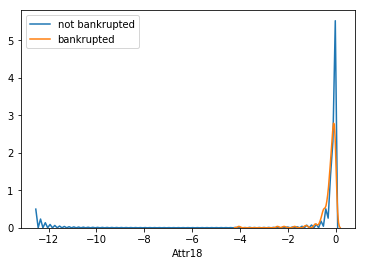

In [168]:
find_best_i(18, 0, 10)

Best i :  5
Best ratio :  0.052547073419938695
Bankrupted :  360
Not Bankrupted :  6491
# of elements :  6851


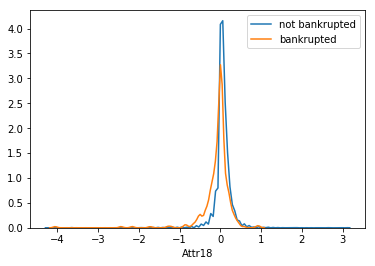

In [169]:
find_best_i_abs(18, 0, 10)

## X19

In [170]:
def intro(feature_num) : 
    print("Number of ? : ", np.sum(x[feature_num]=="?"))
    print("Length of the variable : ", len(x[feature_num]))

In [171]:
intro(19)

Number of ? :  0
Length of the variable :  6841


C:\Users\MINJU\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [172]:
def comparison(feature_num, min = None, max = None) : 
    ax2 = sns.distplot(x[feature_num][data["class"]==0], hist = False, label = "not bankrupted")
    ax2 = sns.distplot(x[feature_num][data["class"]==1], hist = False, label = "bankrupted")
    if min!=None :
        ax2.set(xlim = (min,max))
    ax2.legend()

In [173]:
def plot(feature_num, min = None, max = None) : 
    ax = sns.distplot(x[feature_num])
    if min!=None :
        ax.set(xlim = (min,max))

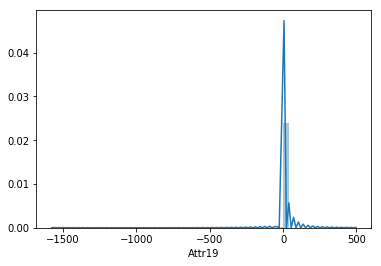

In [174]:
plot(19)

In [175]:
x[19].sort_values()

2555   -1578.7000
5935    -788.1100
5810    -668.5000
3794     -67.7390
1108     -63.5340
          ...    
5743       7.4934
3627      27.3560
1458     129.0200
6494     305.5000
5304     497.0200
Name: Attr19, Length: 6841, dtype: float64

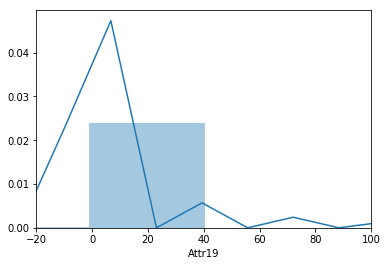

In [176]:
plot(19,-20,100)

In [177]:
test_data = data[["Attr13", "Attr19"]][(data["Attr13"]!="?") & (data["Attr19"]!="?")].astype("float64")
test_data.corr()

,Attr13,Attr19
Attr13,1.000000,0.570695
Attr19,0.570695,1.000000


어느정도는 있다

C:\Users\MINJU\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


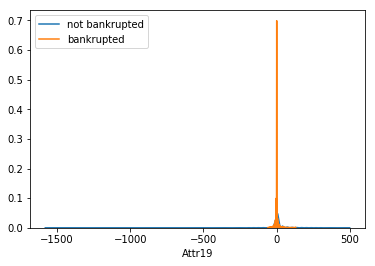

In [178]:
comparison(19)

Best i :  0
Best ratio :  0.11068211068211069
Bankrupted :  172
Not Bankrupted :  1382
# of elements :  1554


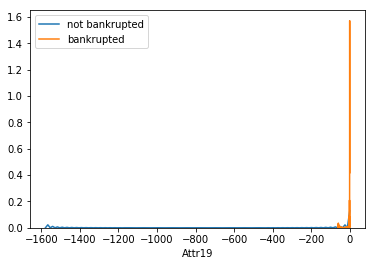

In [179]:
find_best_i(19, 0, 50)

Best i :  8
Best ratio :  0.05247727939020815
Bankrupted :  358
Not Bankrupted :  6464
# of elements :  6822


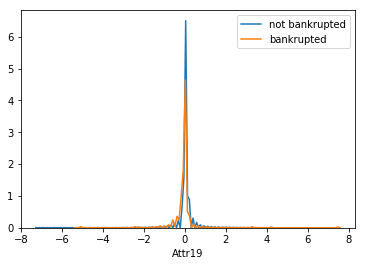

In [180]:
find_best_i_abs(19, 0, 50)

# X20

In [181]:
intro(20)

Number of ? :  0
Length of the variable :  6841


C:\Users\MINJU\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


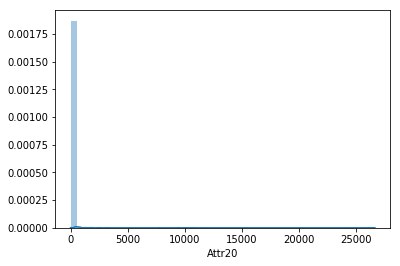

In [182]:
plot(20)

In [183]:
x[20].sort_values()

1439        0.0
1141        0.0
1140        0.0
5612        0.0
6201        0.0
         ...   
4080     7695.3
4594     9444.6
1458    10620.0
45      15617.0
1542    26606.0
Name: Attr20, Length: 6841, dtype: float64

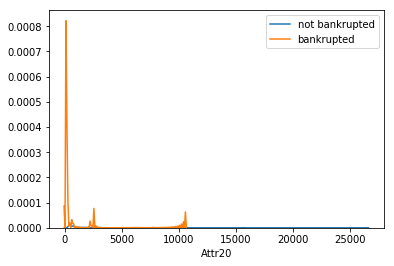

In [184]:
comparison(20)

Best i :  0
Best ratio :  0.09046454767726161
Bankrupted :  37
Not Bankrupted :  372
# of elements :  409


C:\Users\MINJU\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\MINJU\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\MINJU\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


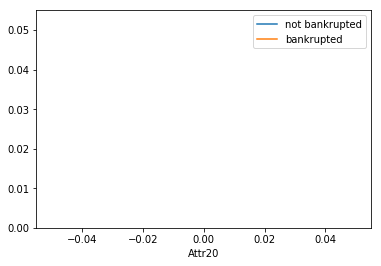

In [185]:
find_best_i(20, 0, 2500)

## X21

In [186]:
intro(21)

Number of ? :  0
Length of the variable :  6743


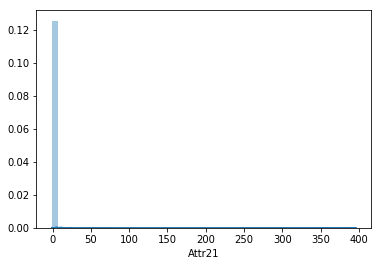

In [187]:
plot(21)

In [188]:
def sort(feature_num) : 
    return x[feature_num].sort_values()

In [189]:
sort(21)

1593     -1.14630
5304     -0.39667
5072      0.00000
4119      0.00000
880       0.00000
          ...    
5803     24.36600
4741     34.85800
1188     69.12800
2200    311.15000
5718    396.16000
Name: Attr21, Length: 6743, dtype: float64

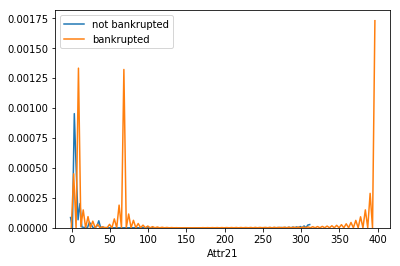

In [190]:
comparison(21)

Best i :  0
Best ratio :  0.1111111111111111
Bankrupted :  1
Not Bankrupted :  8
# of elements :  9


C:\Users\MINJU\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\MINJU\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\MINJU\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)


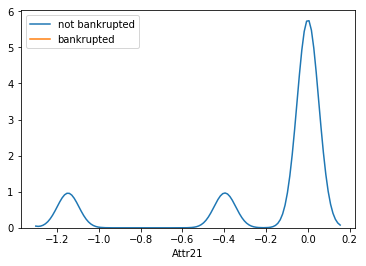

In [191]:
find_best_i(21, 0, np.round(np.max(x[21])).astype("int64"))

얘는 뭔가 comparison 그래프가 흥미롭게 생겼다.

## X22

In [192]:
intro(22)

Number of ? :  0
Length of the variable :  6855


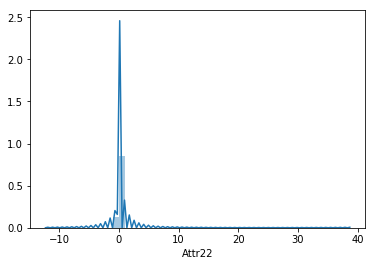

In [193]:
plot(22)

In [194]:
sort(22)

423    -12.2440
3802    -4.3107
3823    -4.0494
2333    -3.6424
727     -2.4577
         ...   
2150     2.6649
3982     3.1233
503      9.8134
5381    13.8600
4994    38.6180
Name: Attr22, Length: 6855, dtype: float64

In [195]:
test_data = data[["Attr9", "Attr14", "Attr16", "Attr18", "Attr22"]][(data["Attr9"]!="?") & (data["Attr14"]!="?") & (data["Attr16"]!="?") 
                                                & (data["Attr18"]!="?") & (data["Attr22"]!="?")].astype("float64")
test_data.corr()

,Attr9,Attr14,Attr16,Attr18,Attr22
Attr9,1.000000,0.822296,0.023148,0.552781,0.832268
Attr14,0.822296,1.000000,0.032788,0.673903,0.988709
Attr16,0.023148,0.032788,1.000000,0.021810,0.051409
Attr18,0.552781,0.673903,0.021810,1.000000,0.663790
Attr22,0.832268,0.988709,0.051409,0.663790,1.000000


9&14와 22는 엄청난 상관관계

C:\Users\MINJU\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


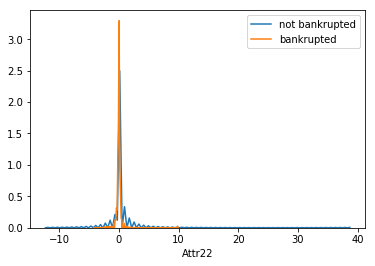

In [196]:
comparison(22)

Best i :  5
Best ratio :  0.052547073419938695
Bankrupted :  360
Not Bankrupted :  6491
# of elements :  6851


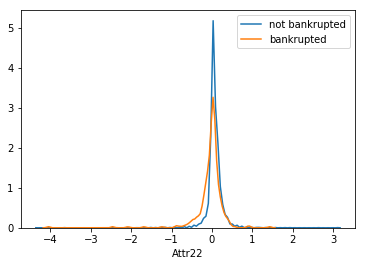

In [197]:
find_best_i_abs(22, 0, 10)

Best i :  0
Best ratio :  0.0811491935483871
Bankrupted :  161
Not Bankrupted :  1823
# of elements :  1984


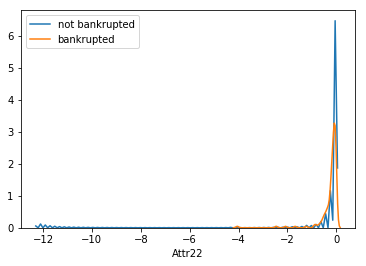

In [198]:
find_best_i(22, 0 , 10)

## X23

In [199]:
def inplt(feature_num) : 
    intro(feature_num)
    plot(feature_num)

C:\Users\MINJU\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Number of ? :  0
Length of the variable :  6841


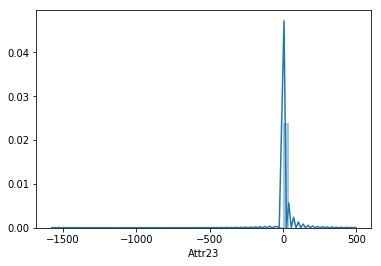

In [200]:
inplt(23)

In [201]:
sort(23)

2555   -1578.700
5935    -788.110
5810    -668.500
1108     -86.316
3794     -67.739
          ...   
3627      18.737
4739      71.764
1458     129.020
6494     251.500
5304     497.020
Name: Attr23, Length: 6841, dtype: float64

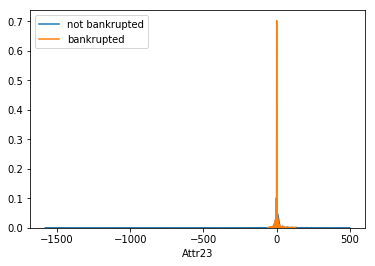

In [202]:
comparison(23)

Best i :  0
Best ratio :  0.1092964824120603
Bankrupted :  174
Not Bankrupted :  1418
# of elements :  1592


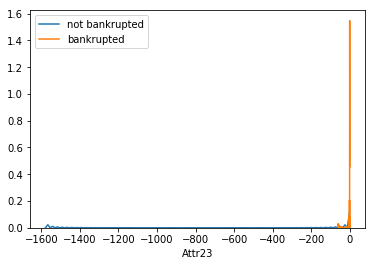

In [203]:
find_best_i(23, 0, 50)

Best i :  7
Best ratio :  0.05249266862170088
Bankrupted :  358
Not Bankrupted :  6462
# of elements :  6820


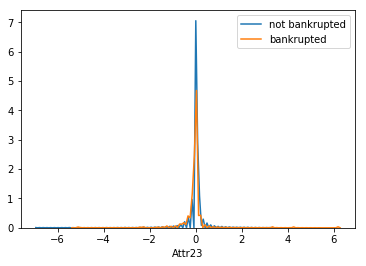

In [204]:
find_best_i_abs(23, 0, 50)

## X24

Number of ? :  0
Length of the variable :  6706


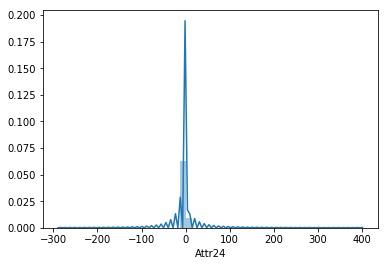

In [205]:
inplt(24)

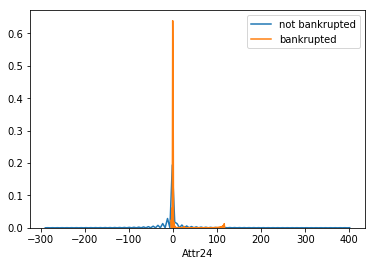

In [206]:
comparison(24)

Best i :  0
Best ratio :  0.10513296227581942
Bankrupted :  170
Not Bankrupted :  1447
# of elements :  1617


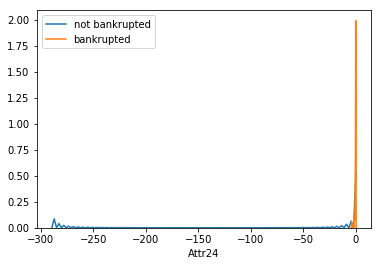

In [207]:
find_best_i(24, 0, 130)

Best i :  118
Best ratio :  0.05388864009553665
Bankrupted :  361
Not Bankrupted :  6338
# of elements :  6699


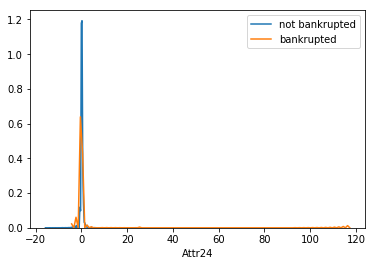

In [208]:
find_best_i_abs(24, 0, 130)

## X25

Number of ? :  0
Length of the variable :  6855


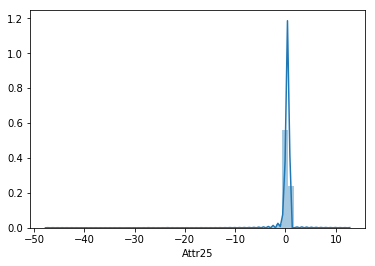

In [209]:
inplt(25)

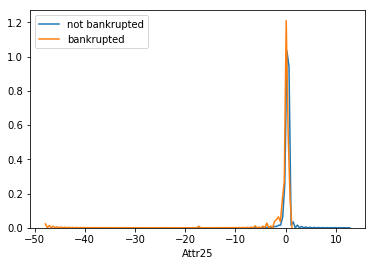

In [210]:
comparison(25)

Best i :  0
Best ratio :  0.12800875273522977
Bankrupted :  117
Not Bankrupted :  797
# of elements :  914


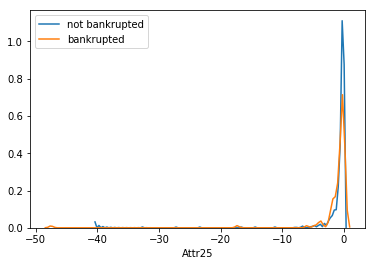

In [211]:
find_best_i(25, 0, 5)

Best i :  0
Best ratio :  0.12800875273522977
Bankrupted :  117
Not Bankrupted :  797
# of elements :  914


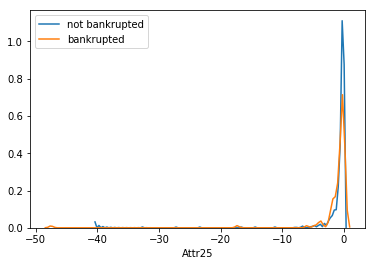

In [212]:
find_best_i(25, 0, 10)

## X26

Number of ? :  0
Length of the variable :  6840


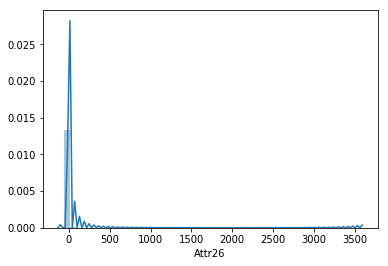

In [213]:
inplt(26)

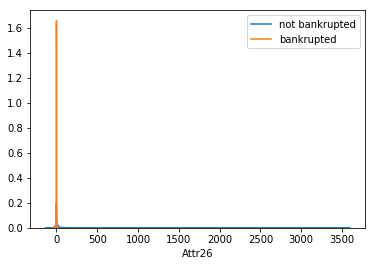

In [214]:
comparison(26)

Best i :  0
Best ratio :  0.14366197183098592
Bankrupted :  153
Not Bankrupted :  912
# of elements :  1065


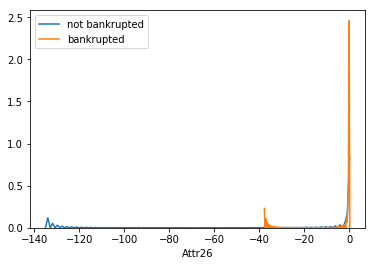

In [215]:
find_best_i(26, 0, 100)

Best i :  1
Best ratio :  0.05726643598615917
Bankrupted :  331
Not Bankrupted :  5449
# of elements :  5780


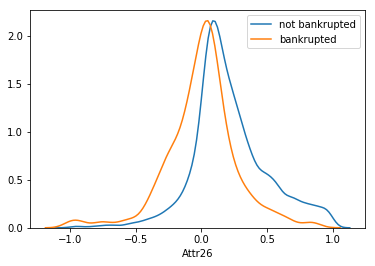

In [216]:
find_best_i_abs(26, 0, 100)

In [217]:
def find(feature_num, min_num, max_num, abs_min, abs_max):
    print("--------------FIND BEST I--------------")
    ratios = []
    for i in range(min_num, max_num):
        ratio_test = data["class"].iloc[list(x[feature_num][x[feature_num]<=i].index)]
        ratios.append(np.sum(ratio_test)/len(ratio_test))
    
    best_i = np.argmax(ratios)
    print("Best i : ", best_i+min_num)
    print("Best ratio : ", ratios[best_i])
    
    best_i_test = data["class"].iloc[list(x[feature_num][x[feature_num]<=best_i+min_num].index)]
    print("Bankrupted : ", np.sum(best_i_test==1))
    print("Not Bankrupted : ", np.sum(best_i_test==0))
    print("# of elements : ", len(best_i_test))
    
    
    print("\n------------FIND BEST I(ABS)-----------")
    ratios2 = []
    for i in range(abs_min, abs_max):
        ratio_test = data["class"].iloc[list(x[feature_num][np.abs(x[feature_num])<=i].index)]
        ratios2.append(np.sum(ratio_test)/len(ratio_test))
    
    best_i2 = np.argmax(ratios)
    print("Best i : ", best_i2+abs_min)
    print("Best ratio : ", ratios2[best_i2])
   
    best_i_test2 = data["class"].iloc[list(x[feature_num][np.abs(x[feature_num])<=best_i+abs_min].index)]
    print("Bankrupted : ", np.sum(best_i_test2==1))
    print("Not Bankrupted : ", np.sum(best_i_test2==0))
    print("# of elements : ", len(best_i_test2))
    
    if ((ratios[best_i]>ratios2[best_i2]) | np.isnan(ratios2[best_i2])):
        print("\n\n[FIND BEST I] ratio is higher(or valid)")
        ax2 = sns.distplot(x[feature_num][x[feature_num]<=best_i][data["class"]==0], hist = False, label = "not bankrupted")
        ax2 = sns.distplot(x[feature_num][x[feature_num]<=best_i][data["class"]==1], hist = False, label = "bankrupted")
        ax2.legend()
        
    elif ((ratios[best_i]<=ratios2[best_i2]) | np.isnan(ratios[best_i])) :
        print("\n\n[FIND BEST I(ABS)] ratio is higher(or valid)")
        ax2 = sns.distplot(x[feature_num][np.abs(x[feature_num])<=best_i][data["class"]==0], hist = False, label = "not bankrupted")
        ax2 = sns.distplot(x[feature_num][np.abs(x[feature_num])<=best_i][data["class"]==1], hist = False, label = "bankrupted")
        ax2.legend()

## X27

Number of ? :  0
Length of the variable :  6393


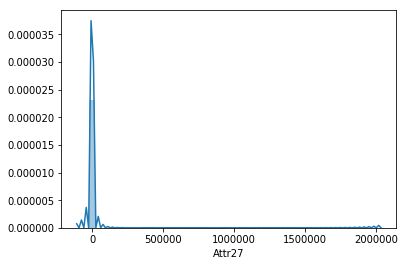

In [218]:
inplt(27)

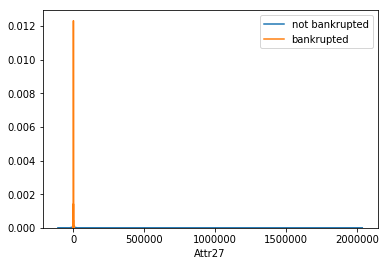

In [219]:
comparison(27)

--------------FIND BEST I--------------
Best i :  0
Best ratio :  0.06576629477392835
Bankrupted :  112
Not Bankrupted :  1591
# of elements :  1703

------------FIND BEST I(ABS)-----------
Best i :  0
Best ratio :  0.0
Bankrupted :  0
Not Bankrupted :  481
# of elements :  481


[FIND BEST I] ratio is higher(or valid)


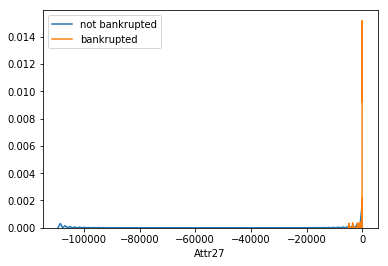

In [220]:
find(27, 0, 100, 0 , 100)

## X28

Number of ? :  0
Length of the variable :  6693


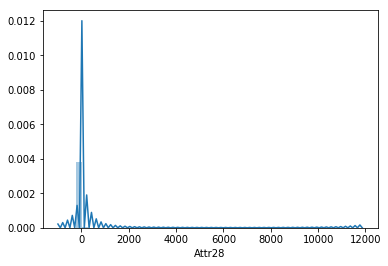

In [221]:
inplt(28)

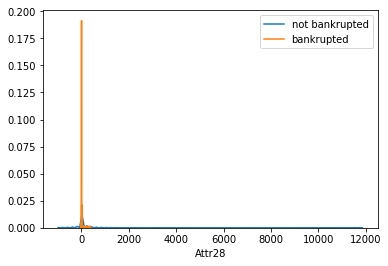

In [222]:
comparison(28)

--------------FIND BEST I--------------
Best i :  0
Best ratio :  0.1054739652870494
Bankrupted :  158
Not Bankrupted :  1340
# of elements :  1498

------------FIND BEST I(ABS)-----------
Best i :  0
Best ratio :  nan
Bankrupted :  0
Not Bankrupted :  0
# of elements :  0


[FIND BEST I] ratio is higher(or valid)


C:\Users\MINJU\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in longlong_scalars


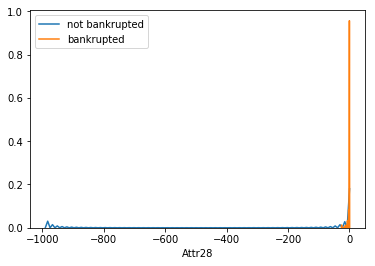

In [223]:
find(28,0,200, 0, 2)

## X29

Number of ? :  0
Length of the variable :  6855


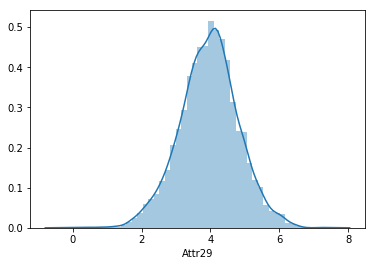

In [224]:
inplt(29)

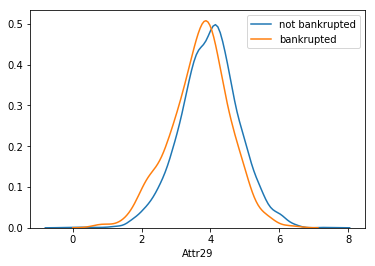

In [225]:
comparison(29)

--------------FIND BEST I--------------
Best i :  1
Best ratio :  0.18181818181818182
Bankrupted :  2
Not Bankrupted :  9
# of elements :  11

------------FIND BEST I(ABS)-----------
Best i :  1
Best ratio :  0.18181818181818182
Bankrupted :  2
Not Bankrupted :  9
# of elements :  11


[FIND BEST I(ABS)] ratio is higher(or valid)


C:\Users\MINJU\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in longlong_scalars


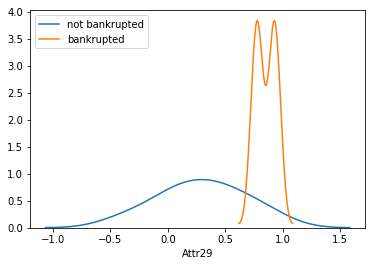

In [226]:
find(29, 0, 8, 0, 3)

## X30

Number of ? :  0
Length of the variable :  6841


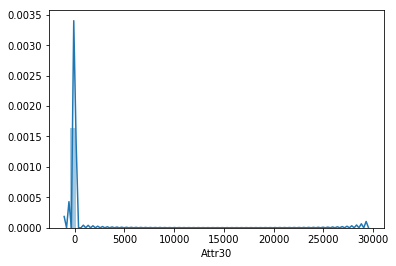

In [227]:
inplt(30)

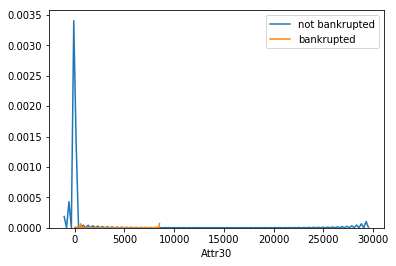

In [228]:
comparison(30)

Best i :  603
Best ratio :  0.05252377468910022
Bankrupted :  359
Not Bankrupted :  6476
# of elements :  6835


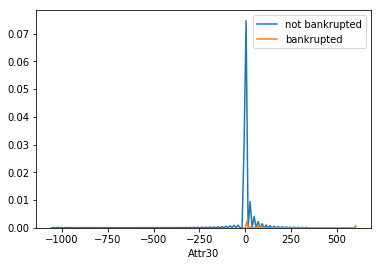

In [229]:
find_best_i(30, 0, 2000)

## X31

Number of ? :  0
Length of the variable :  6841


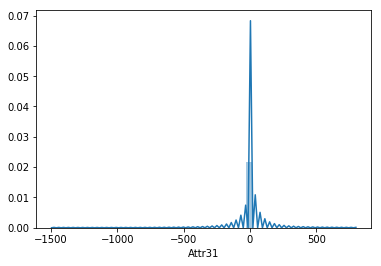

In [230]:
inplt(31)

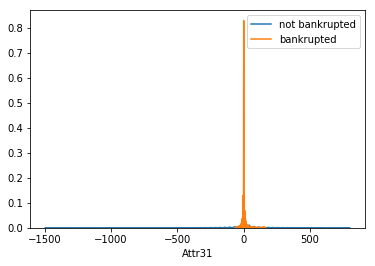

In [231]:
comparison(31)

--------------FIND BEST I--------------
Best i :  0
Best ratio :  0.10953346855983773
Bankrupted :  162
Not Bankrupted :  1317
# of elements :  1479

------------FIND BEST I(ABS)-----------
Best i :  0
Best ratio :  0.0
Bankrupted :  0
Not Bankrupted :  5
# of elements :  5


[FIND BEST I] ratio is higher(or valid)


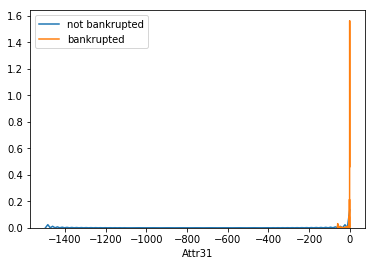

In [232]:
find(31, 0, 200, 0, 50)

## X32

Number of ? :  0
Length of the variable :  6783


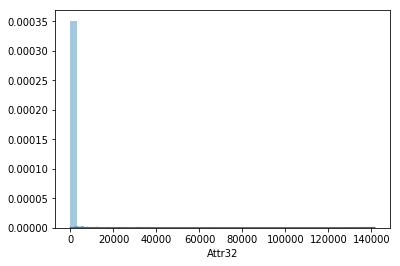

In [233]:
inplt(32)

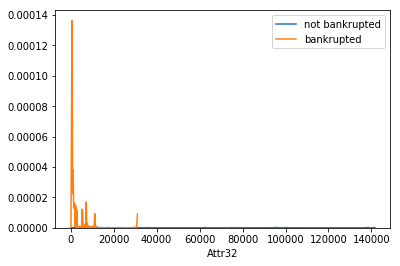

In [234]:
comparison(32)

Best i :  7
Best ratio :  0.08653846153846154
Bankrupted :  9
Not Bankrupted :  95
# of elements :  104


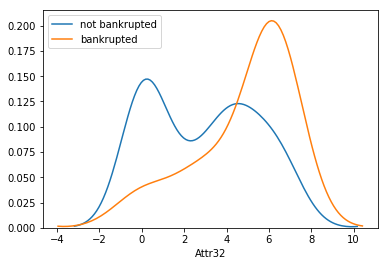

In [235]:
find_best_i(32, 0, 8000)

## X33

Number of ? :  0
Length of the variable :  6827


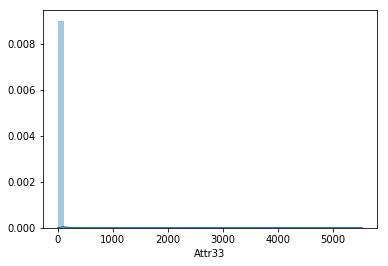

In [236]:
inplt(33)

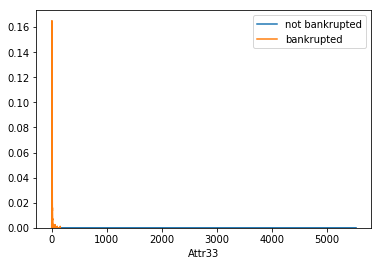

In [237]:
comparison(33)

Best i :  1
Best ratio :  0.09831460674157304
Bankrupted :  35
Not Bankrupted :  321
# of elements :  356


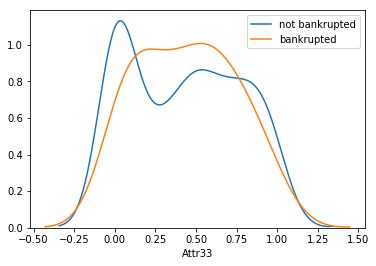

In [238]:
find_best_i(33,0,100)

## X34

Number of ? :  0
Length of the variable :  6840


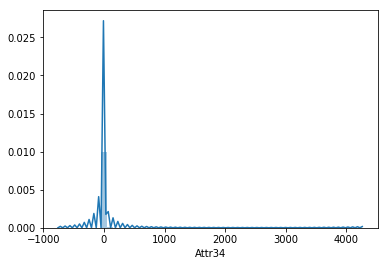

In [239]:
inplt(34)

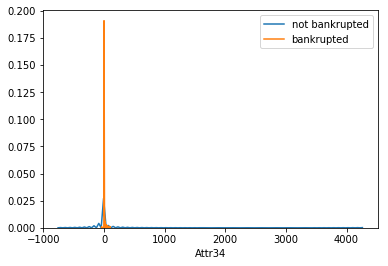

In [240]:
comparison(34)

--------------FIND BEST I--------------
Best i :  1
Best ratio :  0.09831460674157304
Bankrupted :  35
Not Bankrupted :  321
# of elements :  356

------------FIND BEST I(ABS)-----------
Best i :  1
Best ratio :  0.09831460674157304
Bankrupted :  35
Not Bankrupted :  321
# of elements :  356


[FIND BEST I(ABS)] ratio is higher(or valid)


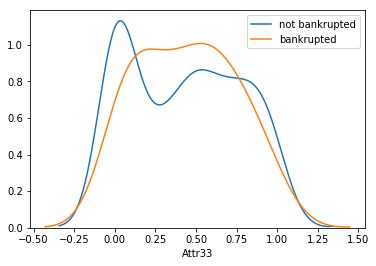

In [241]:
find(33, 0, 50, 0, 20)

## X34

In [242]:
def intt(feature_num):
    print("Number of ? : ", np.sum(x[feature_num]=="?"))
    print("Length of the variable : ", len(x[feature_num]))
    
    fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
    sns.distplot(x[feature_num], ax=ax[0])
    
    sns.distplot(x[feature_num][data["class"]==0], hist = False, label = "not bankrupted", ax=ax[1])
    sns.distplot(x[feature_num][data["class"]==1], hist = False, label = "bankrupted", ax=ax[1])

Number of ? :  0
Length of the variable :  6840


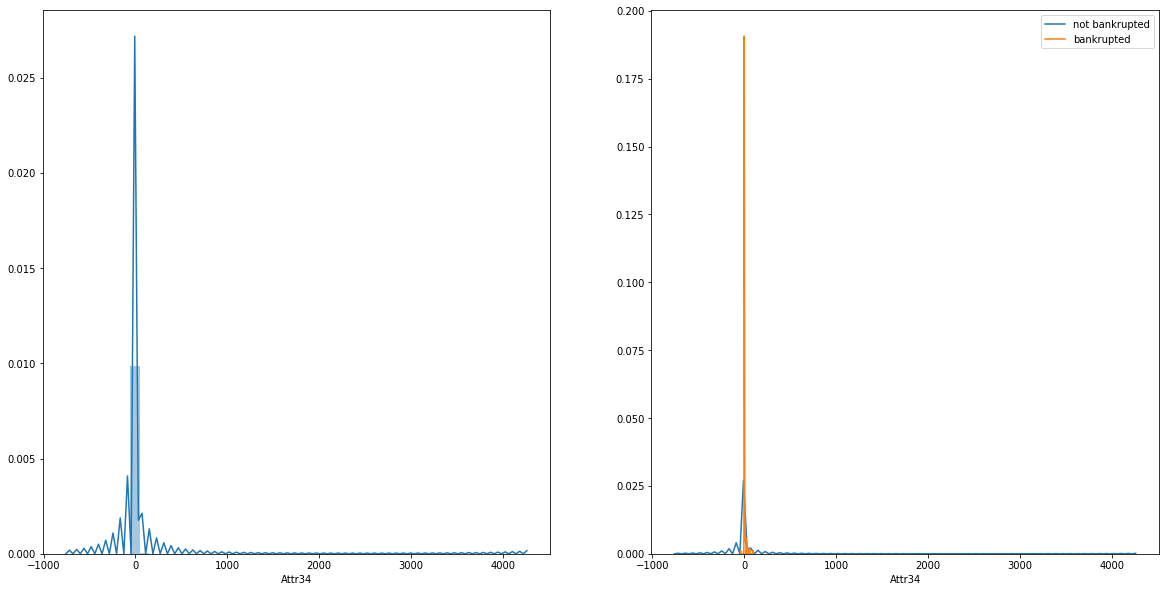

In [243]:
intt(34)

Best i :  0
Best ratio :  0.079002079002079
Bankrupted :  38
Not Bankrupted :  443
# of elements :  481


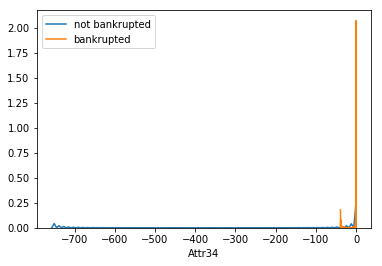

In [244]:
find_best_i(34,0,50)

## X35

Number of ? :  0
Length of the variable :  6855


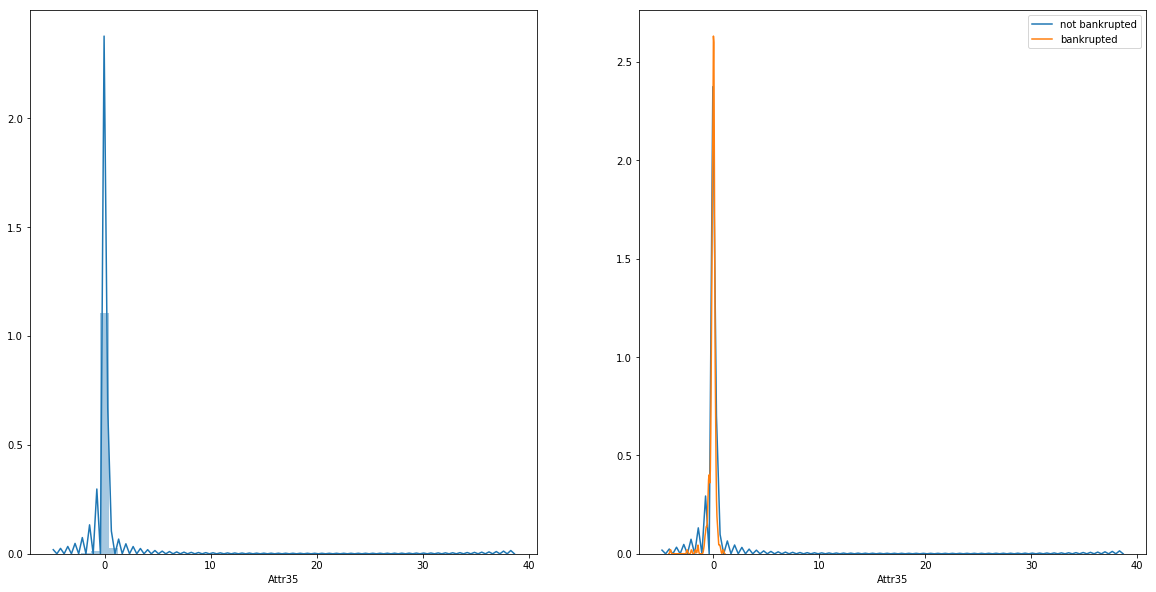

In [245]:
intt(35)

--------------FIND BEST I--------------
Best i :  0
Best ratio :  0.1167929292929293
Bankrupted :  185
Not Bankrupted :  1399
# of elements :  1584

------------FIND BEST I(ABS)-----------
Best i :  0
Best ratio :  0.0
Bankrupted :  0
Not Bankrupted :  39
# of elements :  39


[FIND BEST I] ratio is higher(or valid)


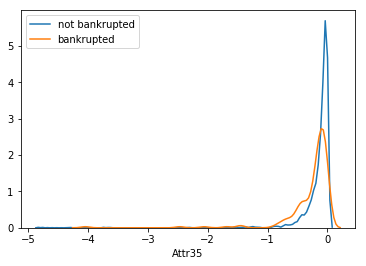

In [246]:
find(35, 0, 2, 0, 2)

## X36

Number of ? :  0
Length of the variable :  6855


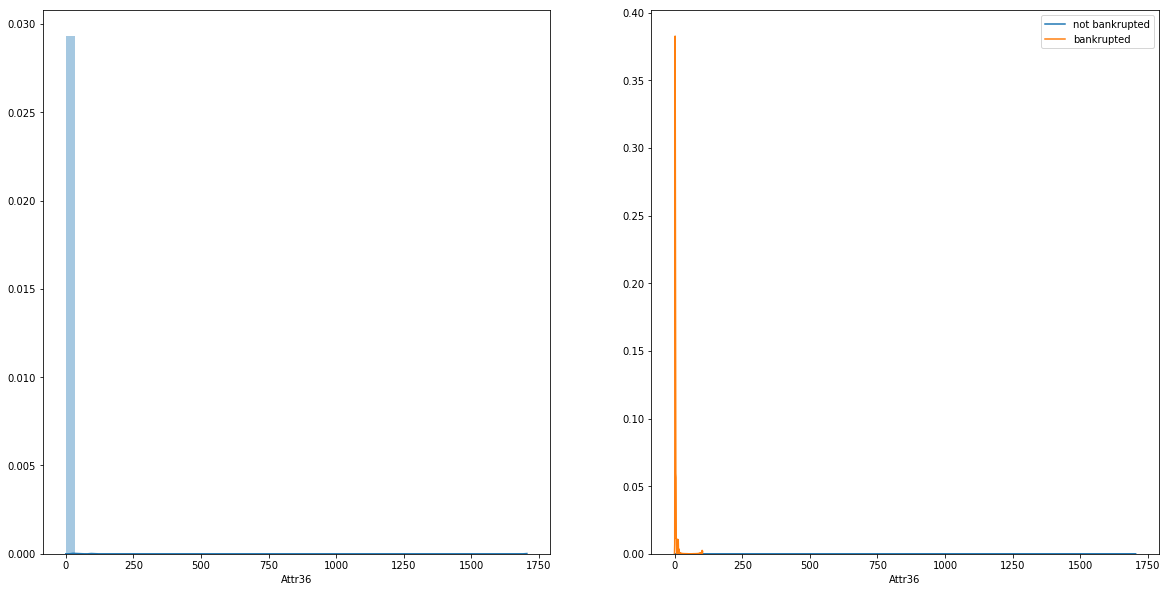

In [247]:
intt(36)

Best i :  16
Best ratio :  0.052600818234950324
Bankrupted :  360
Not Bankrupted :  6484
# of elements :  6844


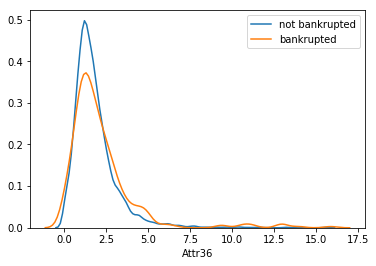

In [248]:
find_best_i(36, 0, 100)

## X37

Number of ? :  0
Length of the variable :  3755


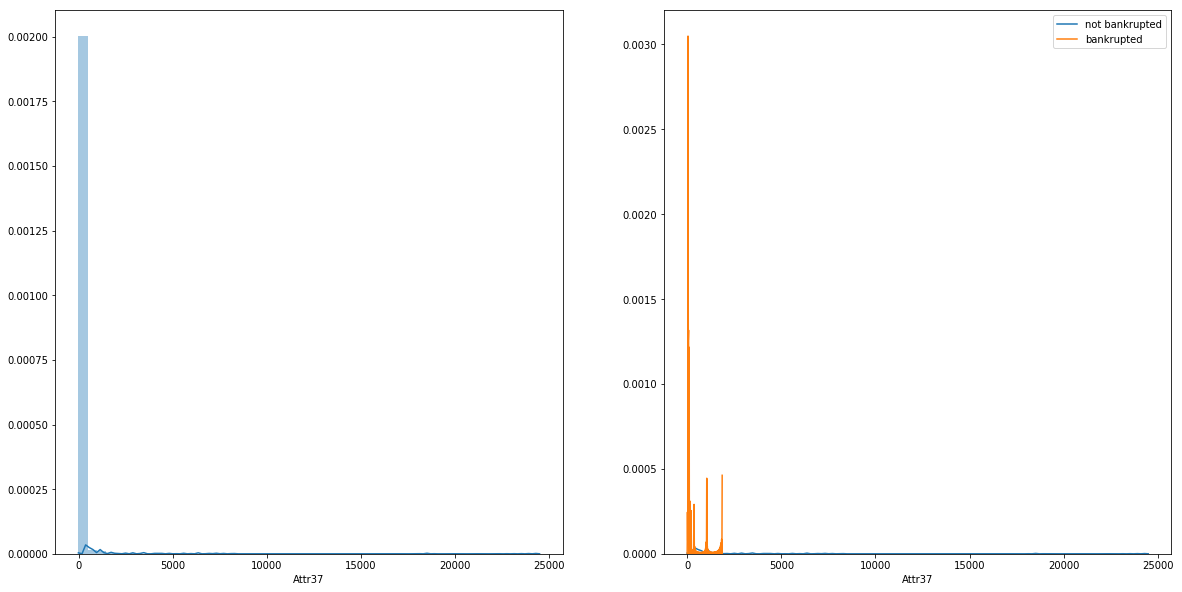

In [249]:
intt(37)

Best i :  2
Best ratio :  0.05615696887686062
Bankrupted :  83
Not Bankrupted :  1395
# of elements :  1478


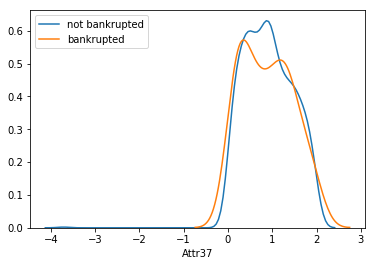

In [250]:
find_best_i(37, 0, 2000)

## X38

Number of ? :  0
Length of the variable :  6855


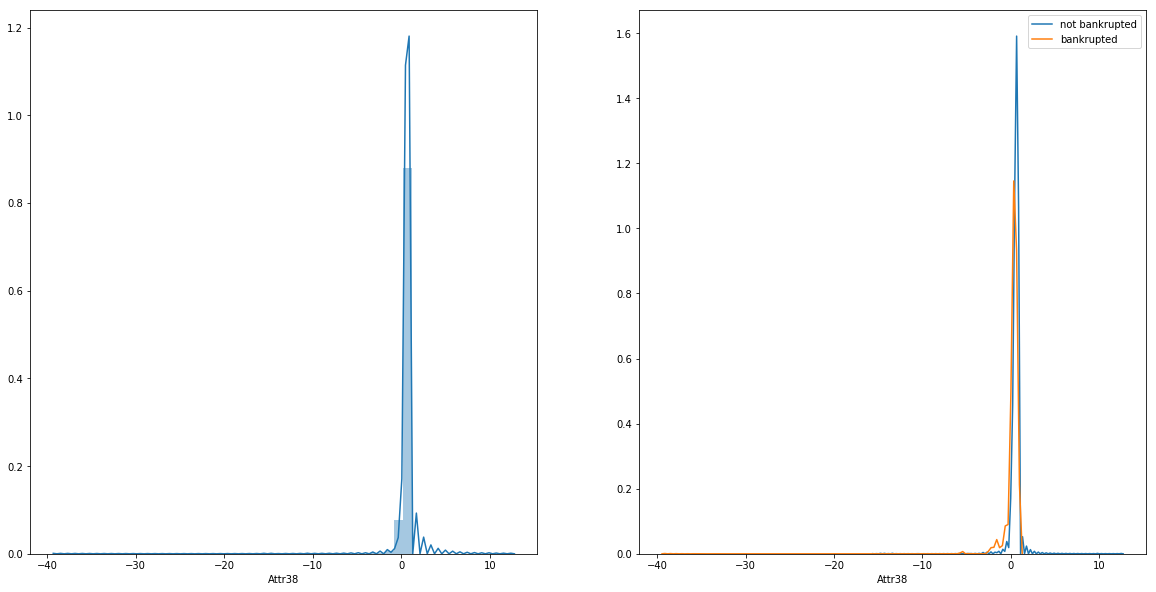

In [251]:
intt(38)

Best i :  0
Best ratio :  0.17328519855595667
Bankrupted :  48
Not Bankrupted :  229
# of elements :  277


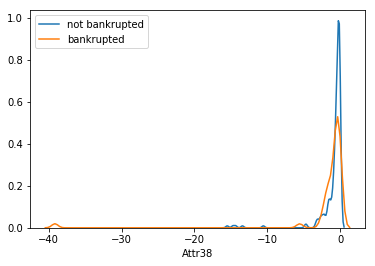

In [252]:
find_best_i(38, 0, 5)

## X39

Number of ? :  0
Length of the variable :  6841


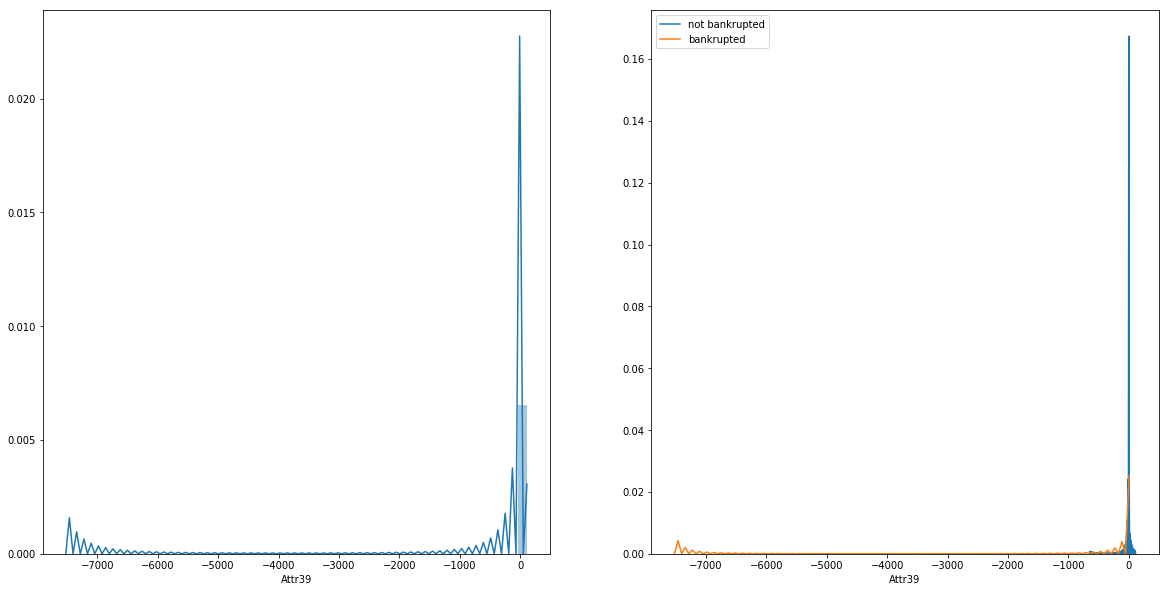

In [253]:
intt(39)

Best i :  0
Best ratio :  0.11719745222929936
Bankrupted :  184
Not Bankrupted :  1386
# of elements :  1570


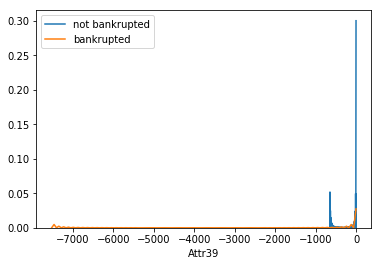

In [254]:
find_best_i(39, 0 , 3)

## X40

Number of ? :  0
Length of the variable :  6827


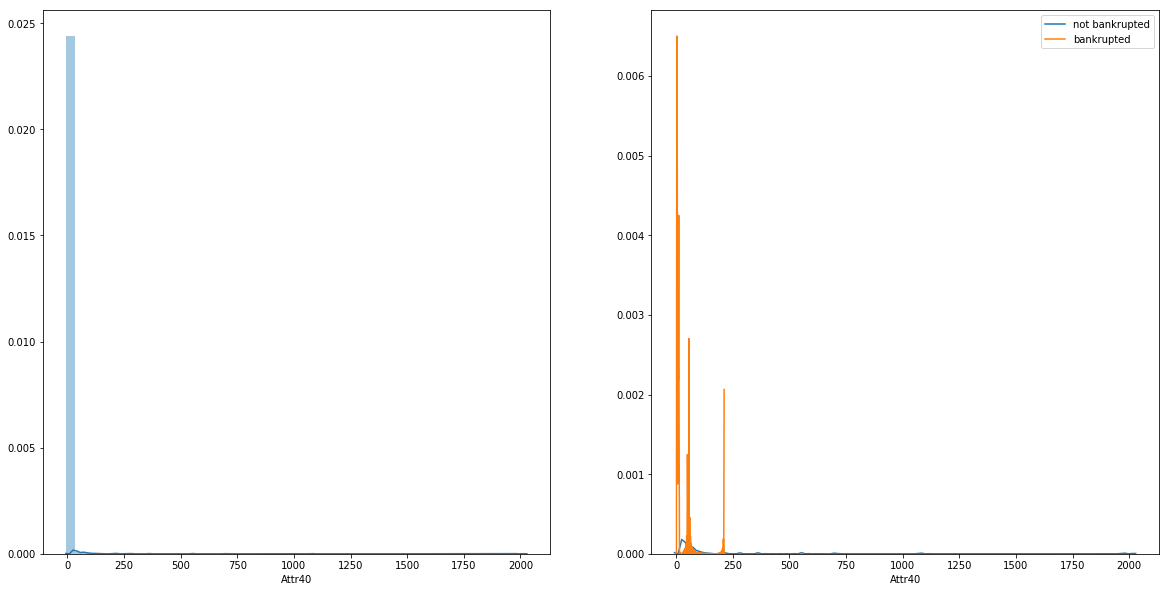

In [255]:
intt(40)

Best i :  1
Best ratio :  0.05774748923959828
Bankrupted :  322
Not Bankrupted :  5254
# of elements :  5576


C:\Users\MINJU\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\MINJU\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\MINJU\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Users\MINJU\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


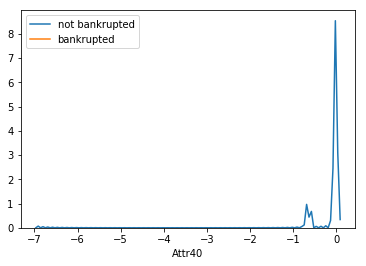

In [256]:
find_best_i(40, 1, 200)

## X41

Number of ? :  0
Length of the variable :  6713


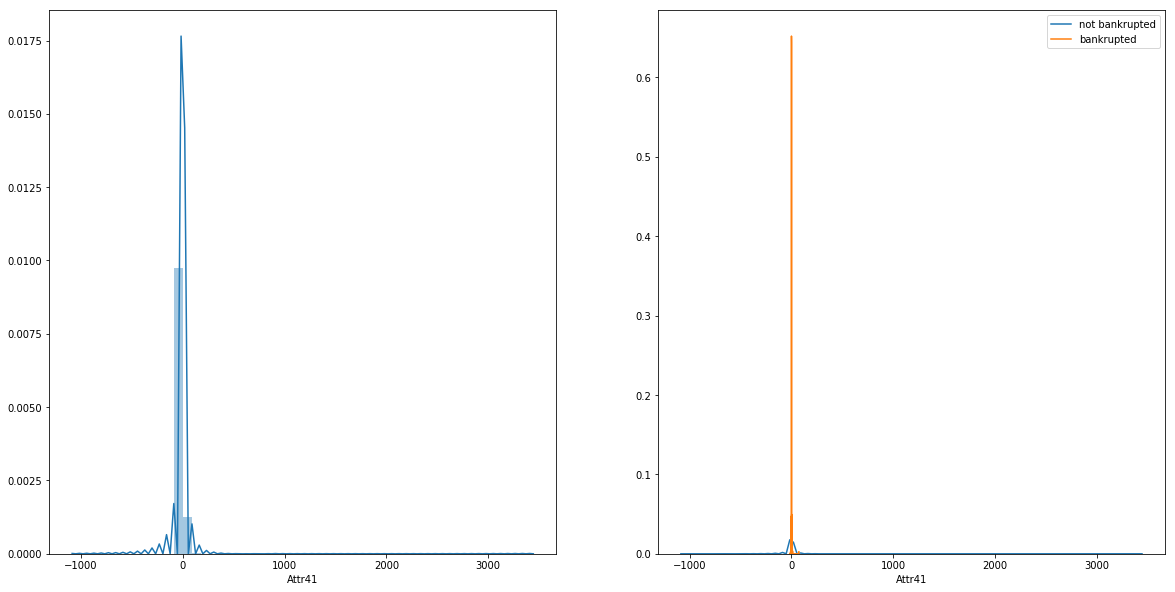

In [257]:
intt(41)

--------------FIND BEST I--------------
Best i :  0
Best ratio :  0.14946236559139786
Bankrupted :  139
Not Bankrupted :  791
# of elements :  930

------------FIND BEST I(ABS)-----------
Best i :  1
Best ratio :  0.0521978021978022
Bankrupted :  323
Not Bankrupted :  5865
# of elements :  6188


[FIND BEST I] ratio is higher(or valid)


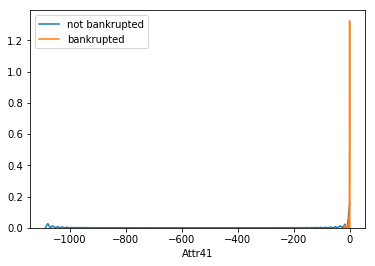

In [258]:
find(41, 0, 50, 1 , 50)

## X42

Number of ? :  0
Length of the variable :  6841


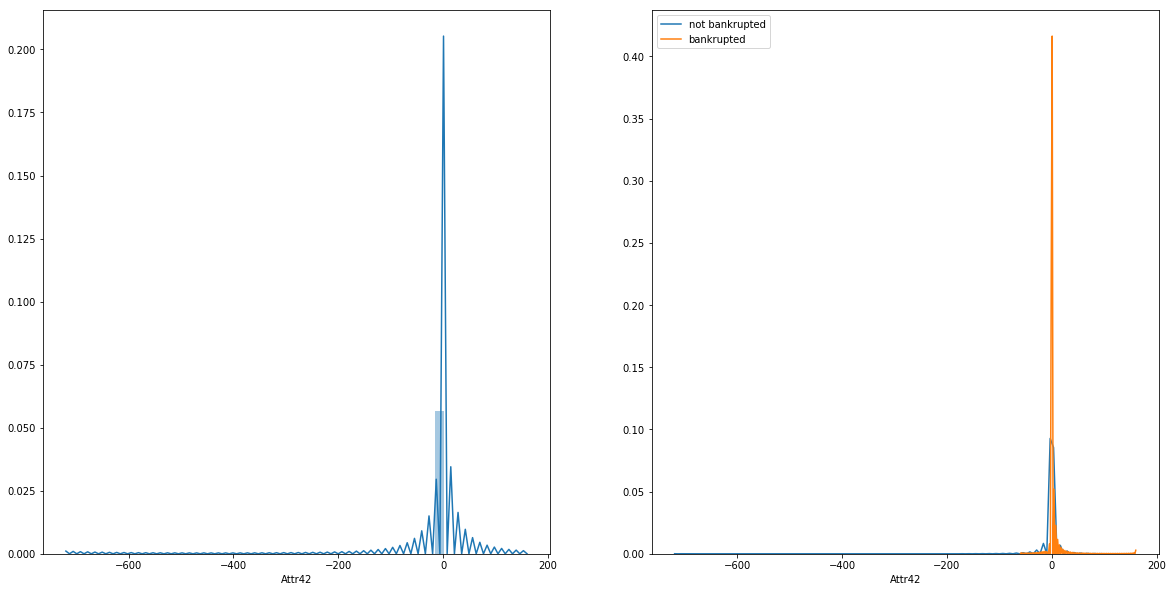

In [259]:
intt(42)

--------------FIND BEST I--------------
Best i :  0
Best ratio :  0.08125952260030472
Bankrupted :  160
Not Bankrupted :  1809
# of elements :  1969

------------FIND BEST I(ABS)-----------
Best i :  1
Best ratio :  0.05151739452257587
Bankrupted :  348
Not Bankrupted :  6407
# of elements :  6755


[FIND BEST I] ratio is higher(or valid)


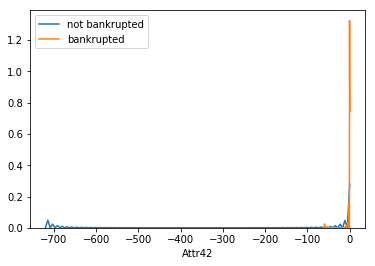

In [260]:
find(42, 0, 100, 1, 100)

## X43

Number of ? :  0
Length of the variable :  6841


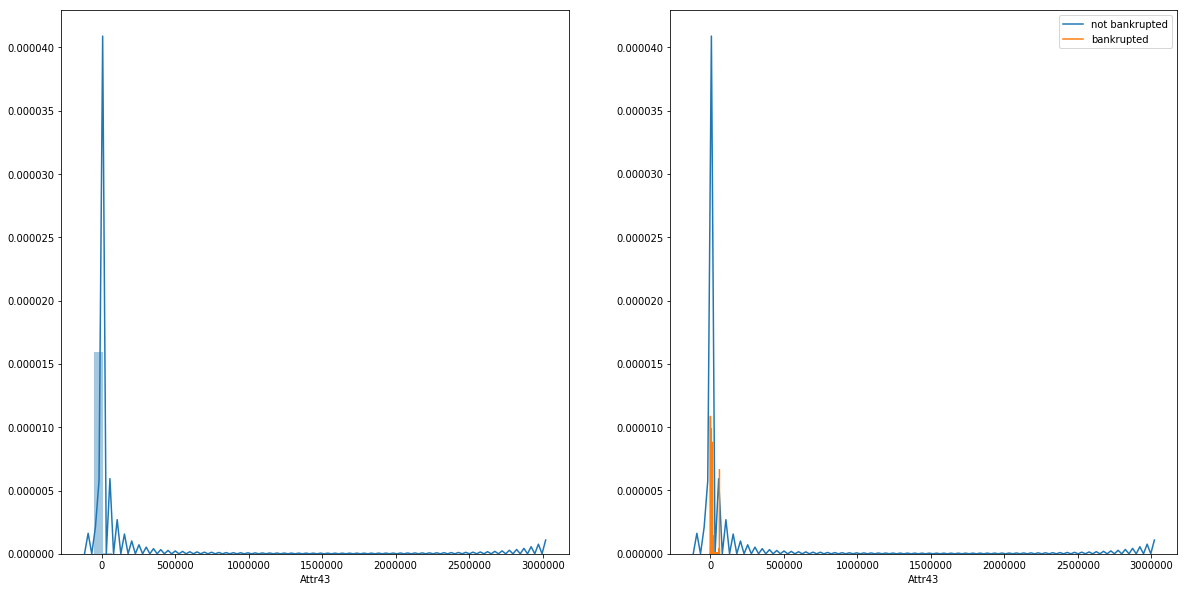

In [261]:
intt(43)

--------------FIND BEST I--------------
Best i :  7
Best ratio :  0.125
Bankrupted :  7
Not Bankrupted :  49
# of elements :  56

------------FIND BEST I(ABS)-----------
Best i :  7
Best ratio :  0.12727272727272726
Bankrupted :  7
Not Bankrupted :  48
# of elements :  55


[FIND BEST I(ABS)] ratio is higher(or valid)


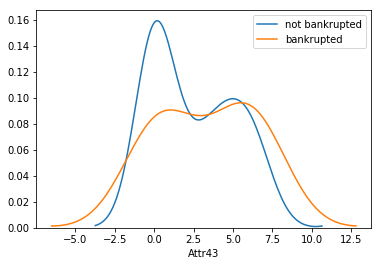

In [262]:
find(43, 0, 100, 0, 100)

## X44

Number of ? :  0
Length of the variable :  6841


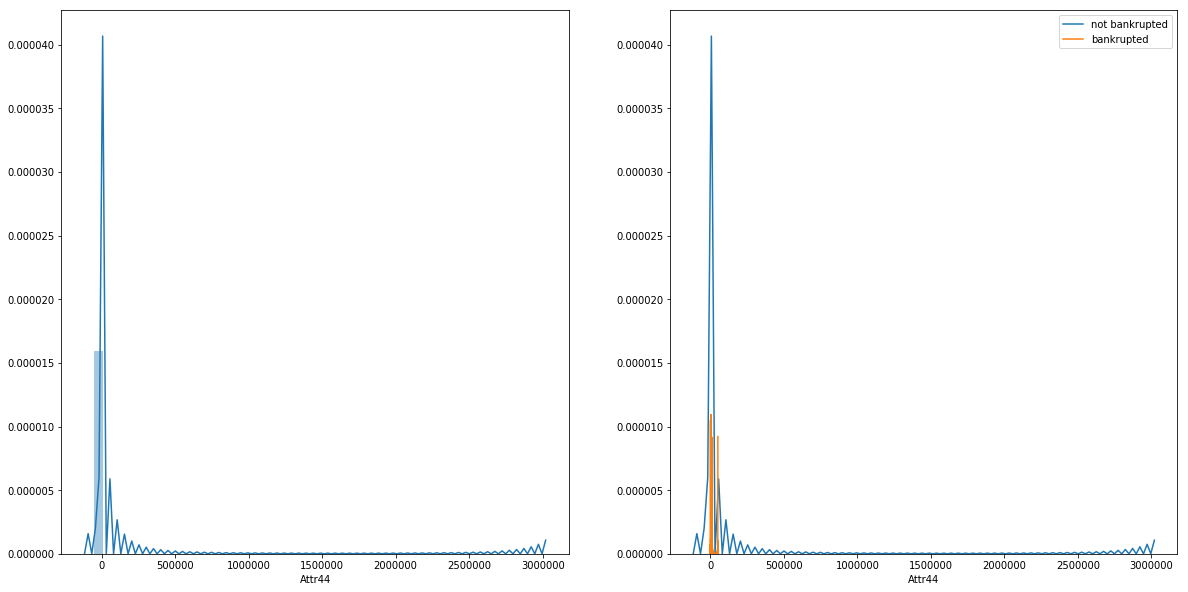

In [263]:
intt(44)

Best i :  3
Best ratio :  0.11627906976744186
Bankrupted :  10
Not Bankrupted :  76
# of elements :  86


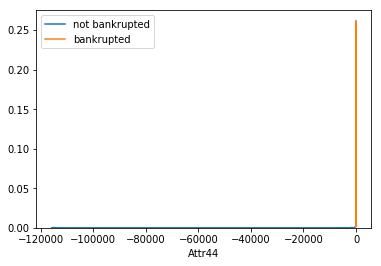

In [264]:
find_best_i(44, 0,100)

## X45

Number of ? :  0
Length of the variable :  6437


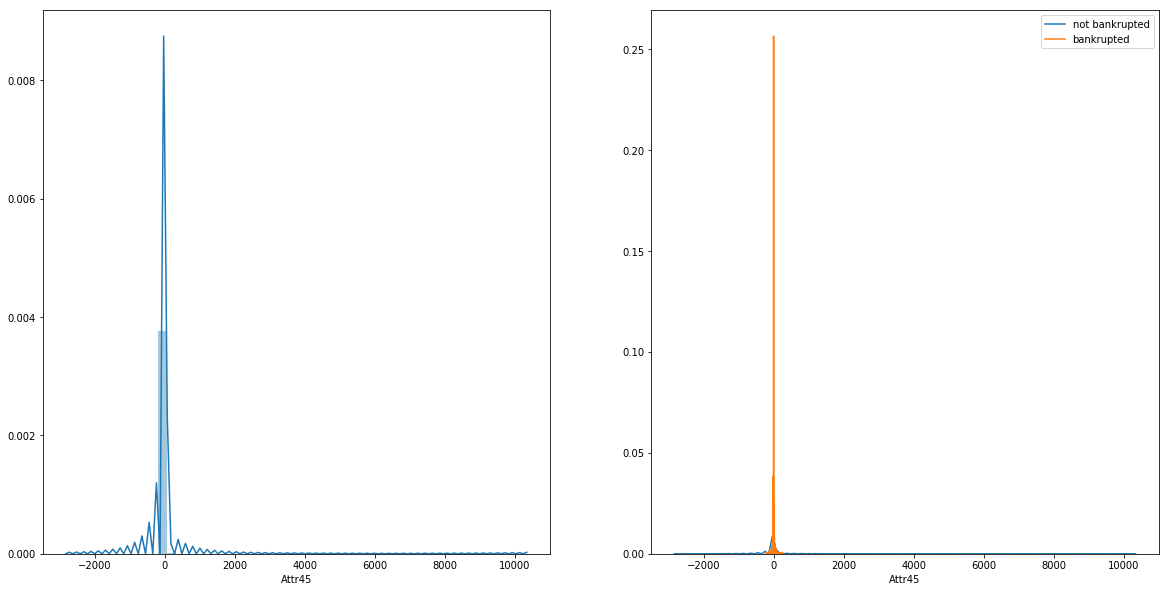

In [265]:
intt(45)

--------------FIND BEST I--------------
Best i :  0
Best ratio :  0.1051912568306011
Bankrupted :  154
Not Bankrupted :  1310
# of elements :  1464

------------FIND BEST I(ABS)-----------
Best i :  0
Best ratio :  0.03225806451612903
Bankrupted :  1
Not Bankrupted :  30
# of elements :  31


[FIND BEST I] ratio is higher(or valid)


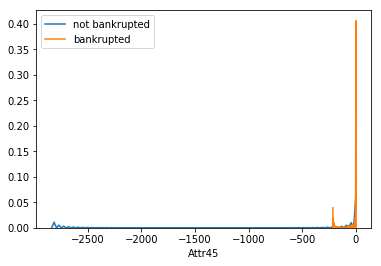

In [266]:
find(45, 0, 100, 0, 100)

## X46

Number of ? :  0
Length of the variable :  6827


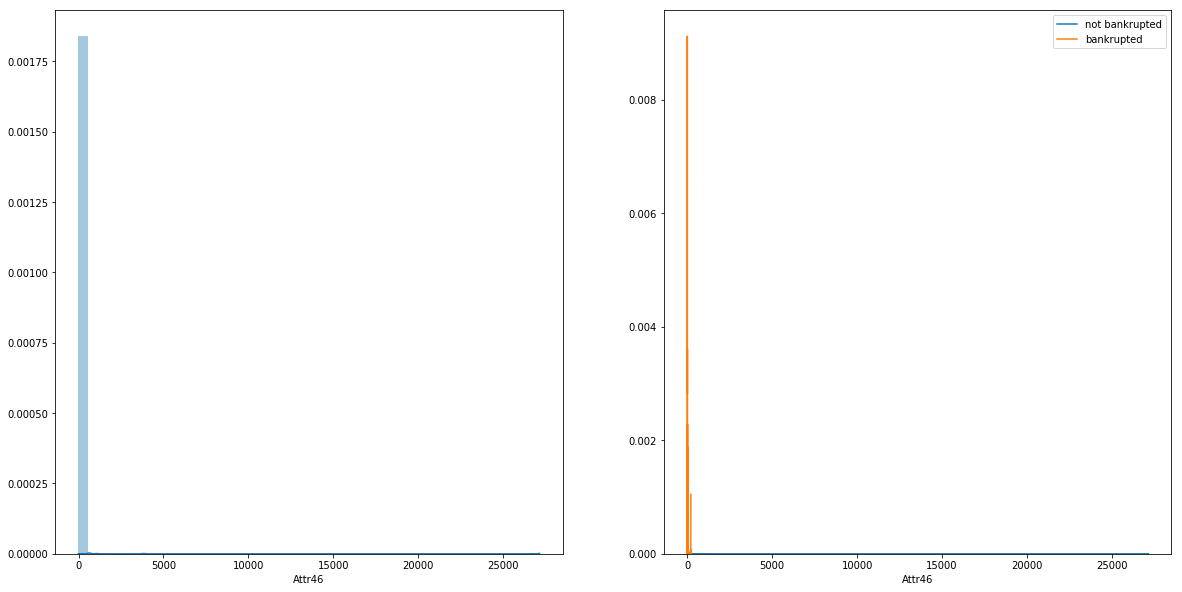

In [267]:
intt(46)

Best i :  1
Best ratio :  0.08387096774193549
Bankrupted :  273
Not Bankrupted :  2982
# of elements :  3255


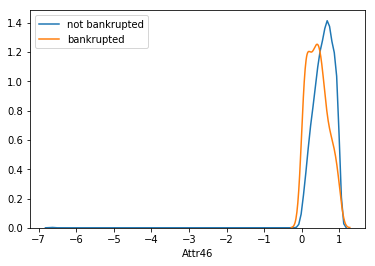

In [268]:
find_best_i(46,0,100)

## X47

Number of ? :  0
Length of the variable :  6798


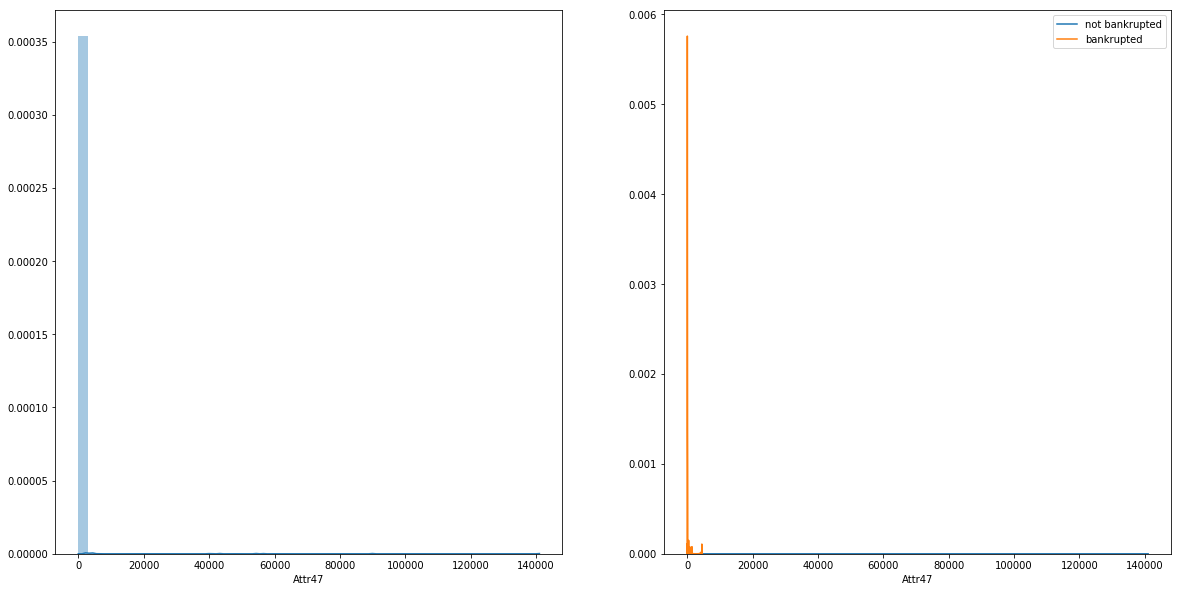

In [269]:
intt(47)

Best i :  0
Best ratio :  0.09156626506024096
Bankrupted :  38
Not Bankrupted :  377
# of elements :  415


C:\Users\MINJU\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\MINJU\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


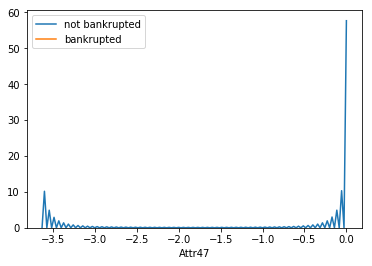

In [270]:
find_best_i(47,0,100)

## X48

Number of ? :  0
Length of the variable :  6855


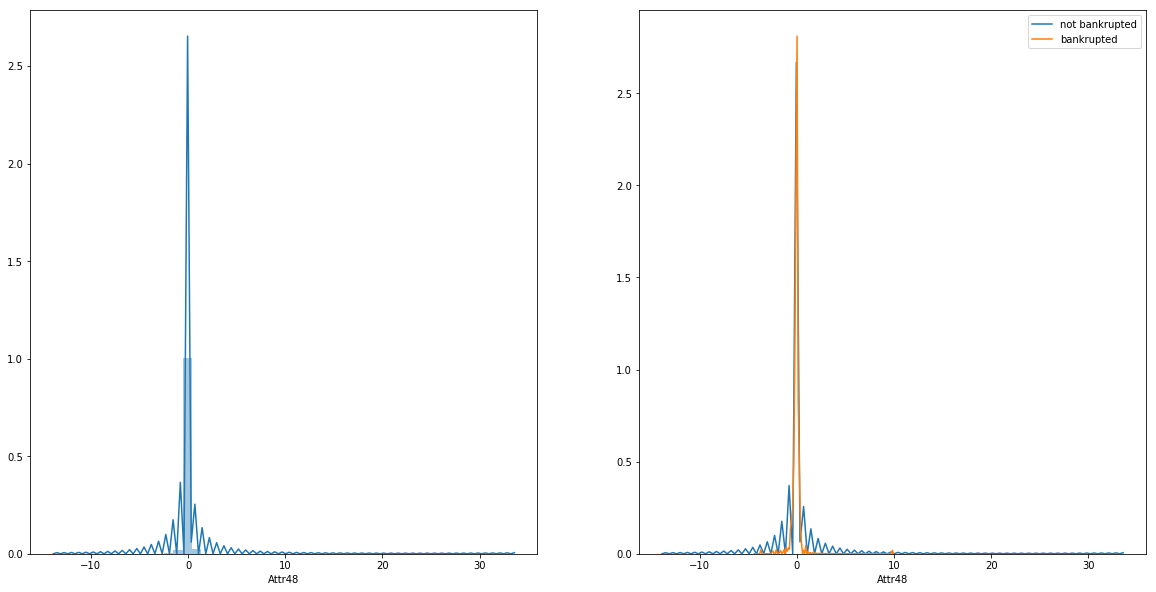

In [271]:
intt(48)

--------------FIND BEST I--------------
Best i :  0
Best ratio :  0.06604651162790698
Bankrupted :  213
Not Bankrupted :  3012
# of elements :  3225

------------FIND BEST I(ABS)-----------
Best i :  0
Best ratio :  0.018633540372670808
Bankrupted :  3
Not Bankrupted :  158
# of elements :  161


[FIND BEST I] ratio is higher(or valid)


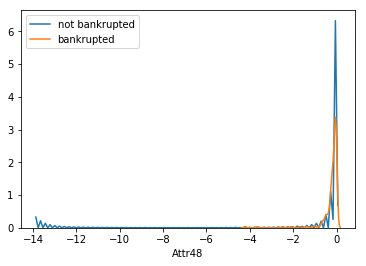

In [272]:
find(48, 0, 10, 0, 10)

## X49

Number of ? :  0
Length of the variable :  6841


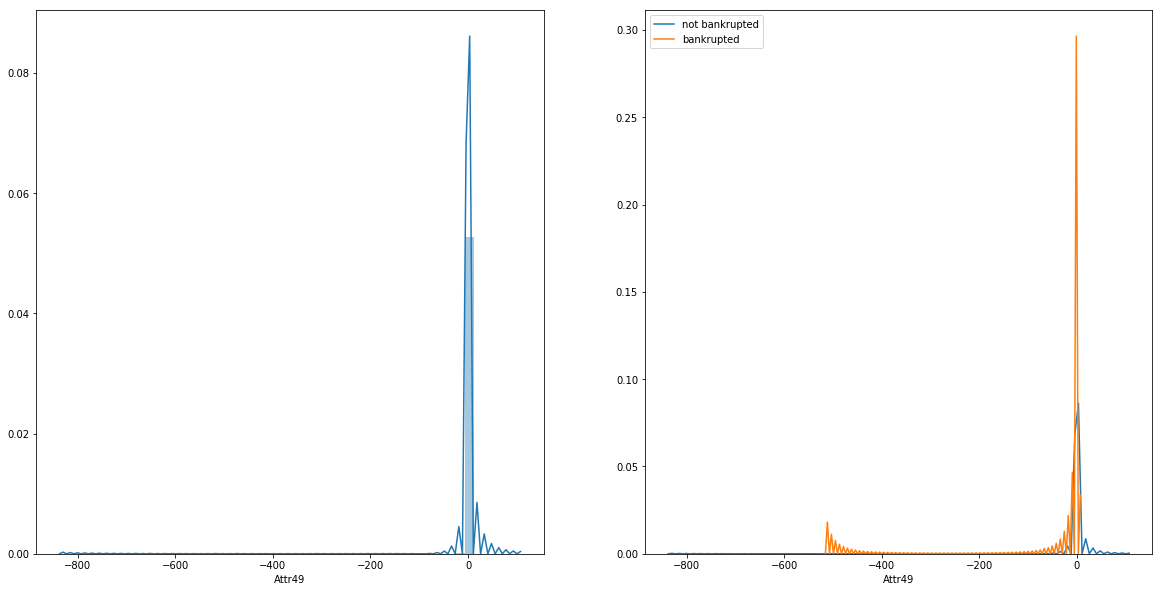

In [273]:
intt(49)

--------------FIND BEST I--------------
Best i :  0
Best ratio :  0.0660230457801308
Bankrupted :  212
Not Bankrupted :  2999
# of elements :  3211

------------FIND BEST I(ABS)-----------
Best i :  0
Best ratio :  0.018633540372670808
Bankrupted :  3
Not Bankrupted :  158
# of elements :  161


[FIND BEST I] ratio is higher(or valid)


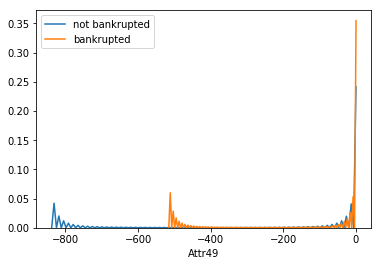

In [274]:
find(49, 0, 5, 0, 10)

## X50

Number of ? :  0
Length of the variable :  6840


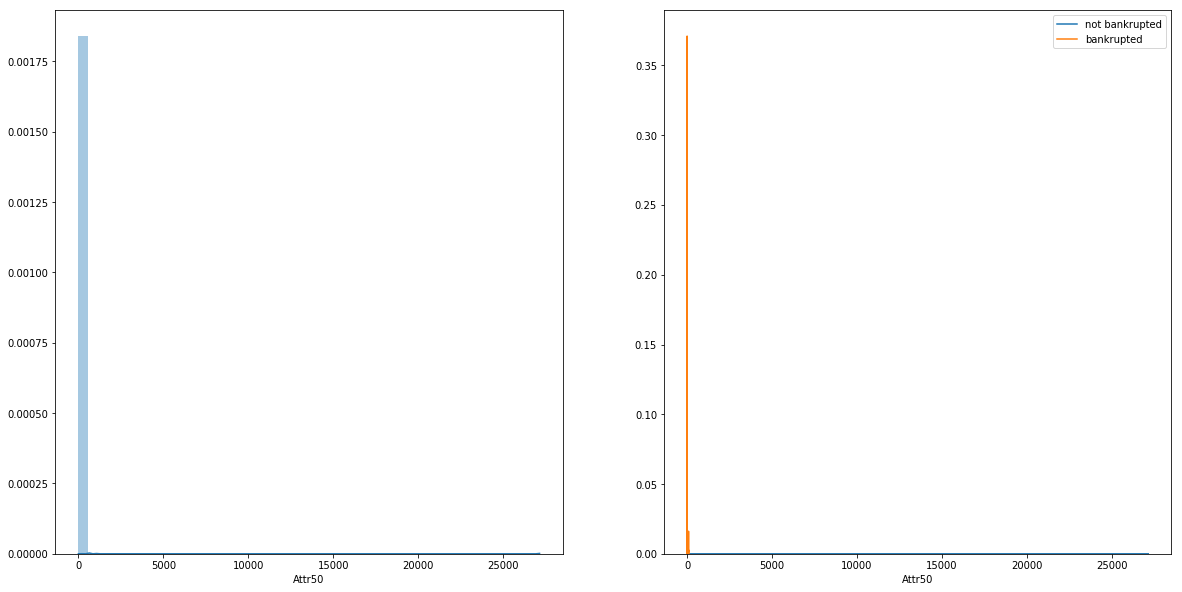

In [275]:
intt(50)

Best i :  1
Best ratio :  0.08400152730049637
Bankrupted :  220
Not Bankrupted :  2399
# of elements :  2619


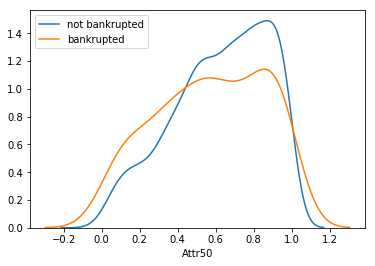

In [276]:
find_best_i(50,0,100)

## X51

Number of ? :  0
Length of the variable :  6855


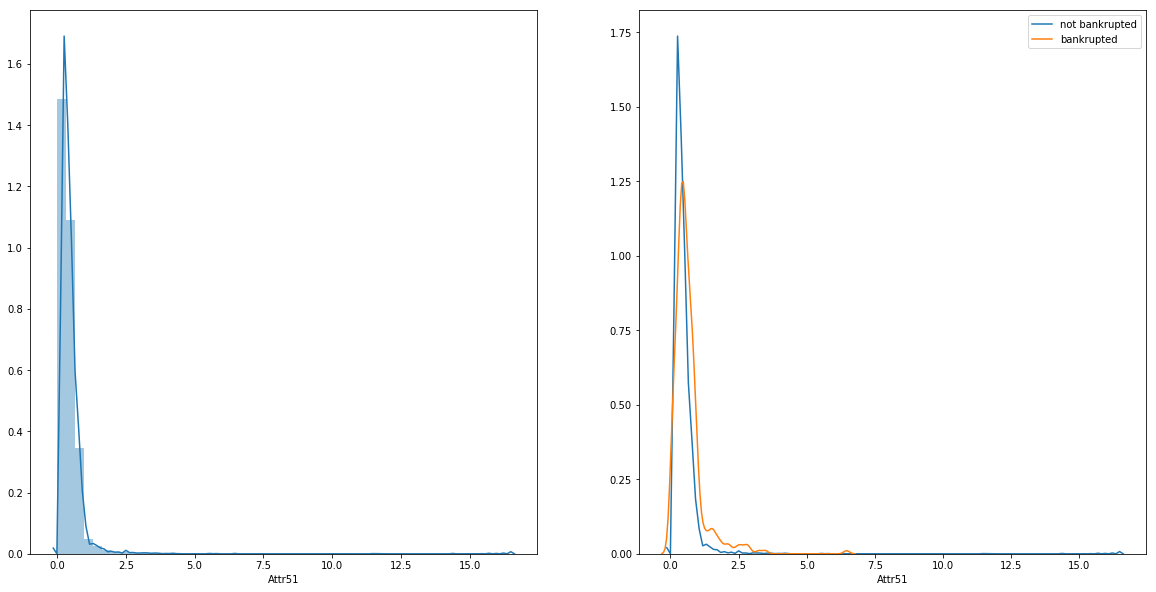

In [277]:
intt(51)

Best i :  7
Best ratio :  0.05269303751277186
Bankrupted :  361
Not Bankrupted :  6490
# of elements :  6851


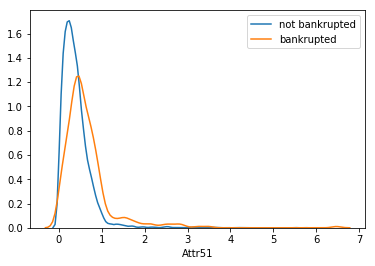

In [278]:
find_best_i(51, 0, 9)

## X52

Number of ? :  0
Length of the variable :  6795


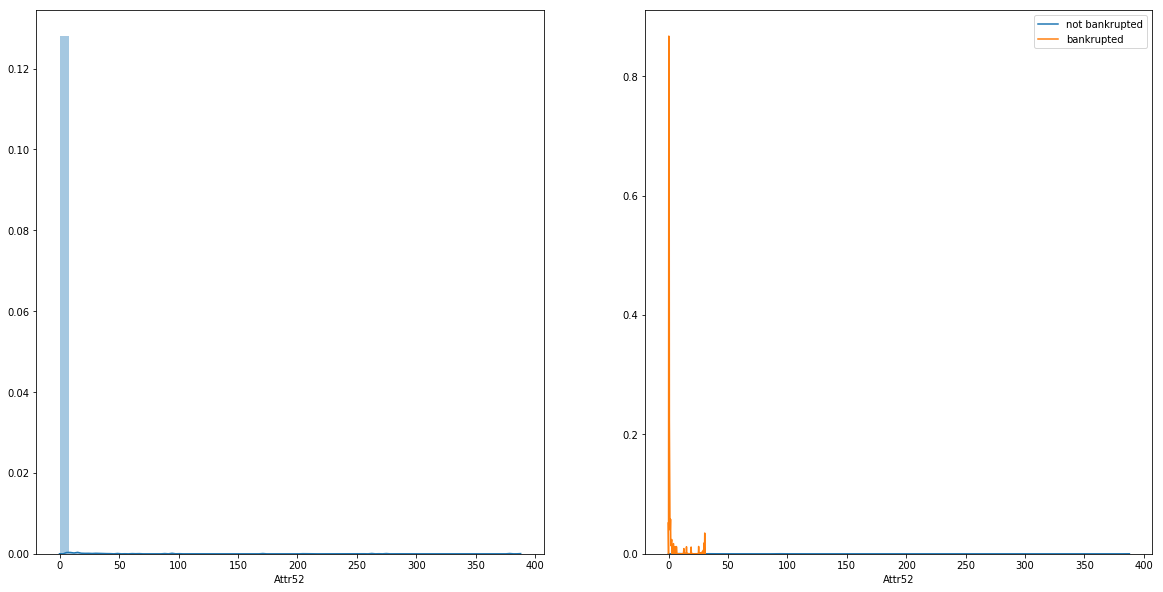

In [279]:
intt(52)

Best i :  31
Best ratio :  0.05312084993359894
Bankrupted :  360
Not Bankrupted :  6417
# of elements :  6777


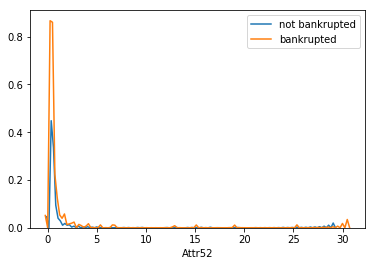

In [280]:
find_best_i(52, 0, 50)

## X53

Number of ? :  0
Length of the variable :  6693


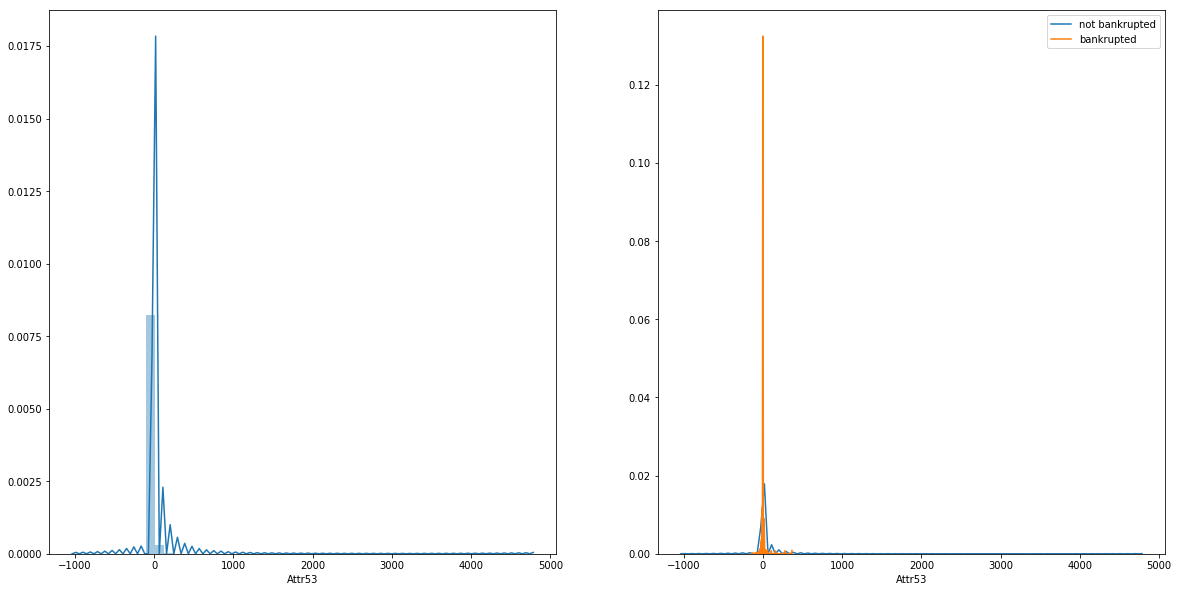

In [281]:
intt(53)

--------------FIND BEST I--------------
Best i :  0
Best ratio :  0.13440860215053763
Bankrupted :  50
Not Bankrupted :  322
# of elements :  372

------------FIND BEST I(ABS)-----------
Best i :  1
Best ratio :  0.071849234393404
Bankrupted :  183
Not Bankrupted :  2364
# of elements :  2547


[FIND BEST I] ratio is higher(or valid)


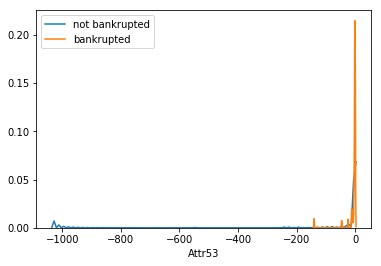

In [282]:
find(53, 0, 100, 1, 100)

## X54

Number of ? :  0
Length of the variable :  6693


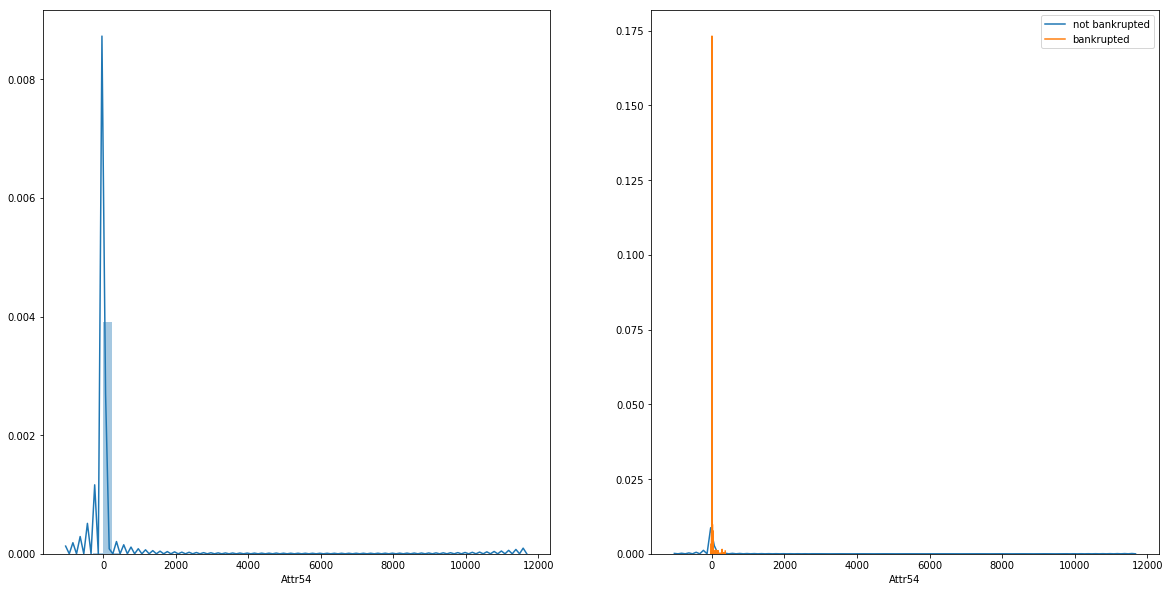

In [283]:
intt(54)

--------------FIND BEST I--------------
Best i :  0
Best ratio :  0.16942148760330578
Bankrupted :  41
Not Bankrupted :  201
# of elements :  242

------------FIND BEST I(ABS)-----------
Best i :  1
Best ratio :  0.0933028048082427
Bankrupted :  163
Not Bankrupted :  1584
# of elements :  1747


[FIND BEST I] ratio is higher(or valid)


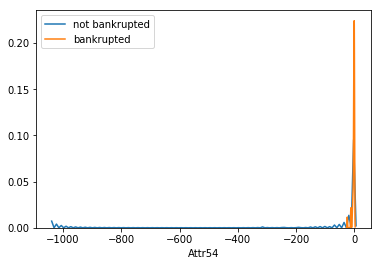

In [284]:
find(54, 0, 100, 1, 20)

## X55

Number of ? :  0
Length of the variable :  6855


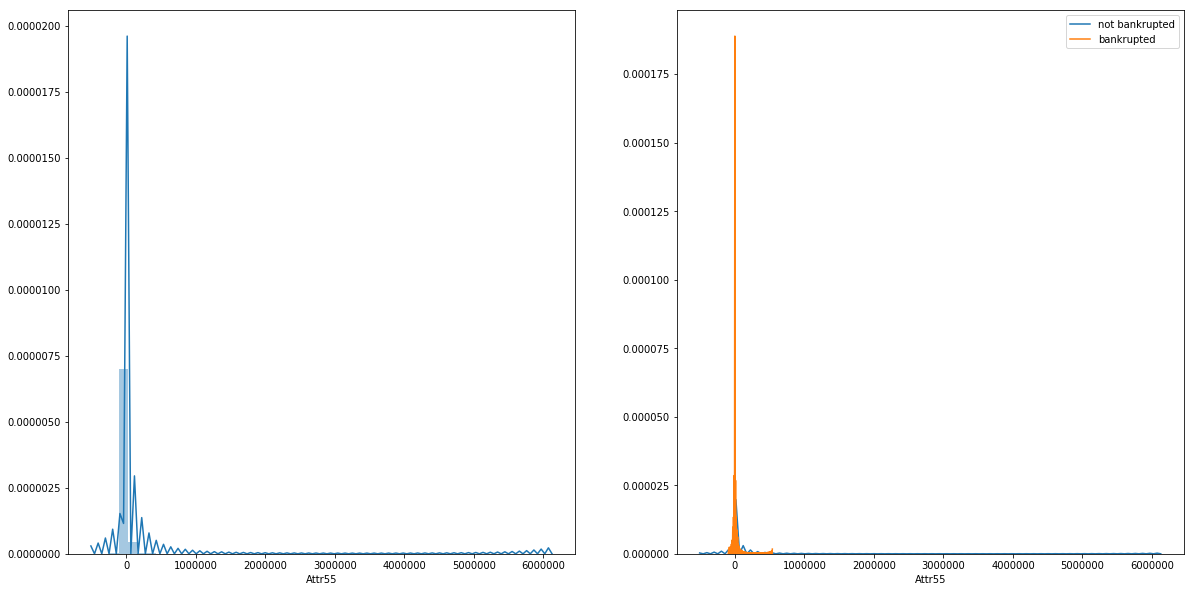

In [285]:
intt(55)

--------------FIND BEST I--------------
Best i :  0
Best ratio :  0.10742705570291777
Bankrupted :  162
Not Bankrupted :  1346
# of elements :  1508

------------FIND BEST I(ABS)-----------


C:\Users\MINJU\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in longlong_scalars


Best i :  0
Best ratio :  nan
Bankrupted :  0
Not Bankrupted :  0
# of elements :  0


[FIND BEST I] ratio is higher(or valid)


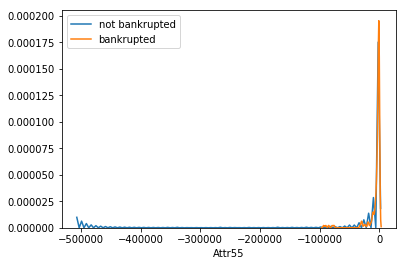

In [286]:
find(55, 0, 200, 0, 100)

## X56

Number of ? :  0
Length of the variable :  6841


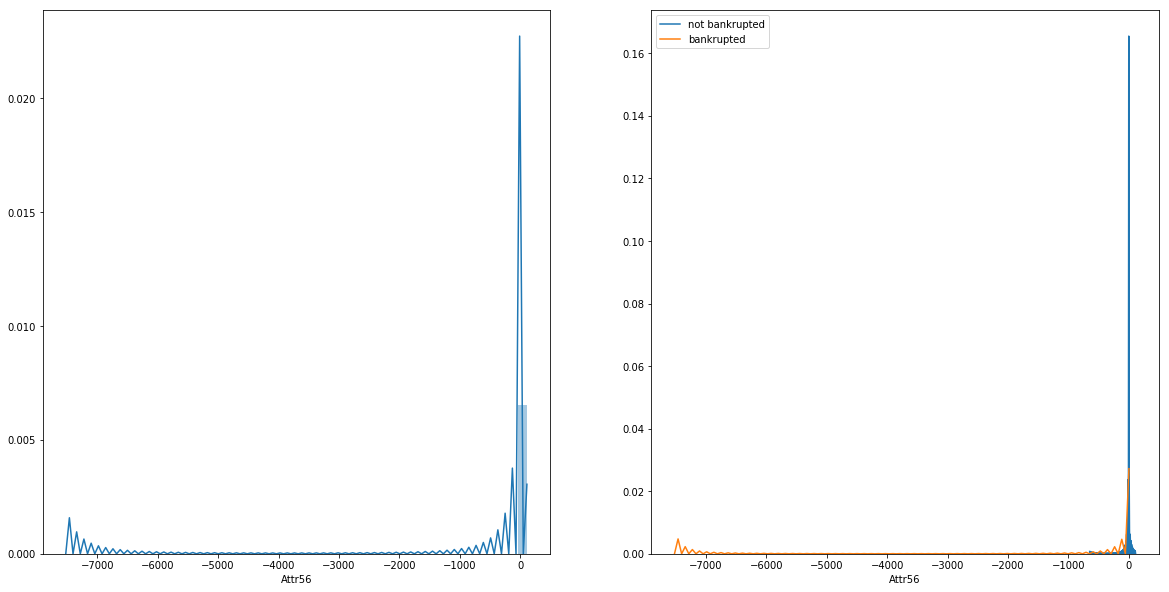

In [287]:
intt(56)

--------------FIND BEST I--------------
Best i :  0
Best ratio :  0.10019023462270134
Bankrupted :  158
Not Bankrupted :  1419
# of elements :  1577

------------FIND BEST I(ABS)-----------
Best i :  1
Best ratio :  0.0515966883500887
Bankrupted :  349
Not Bankrupted :  6415
# of elements :  6764


[FIND BEST I] ratio is higher(or valid)


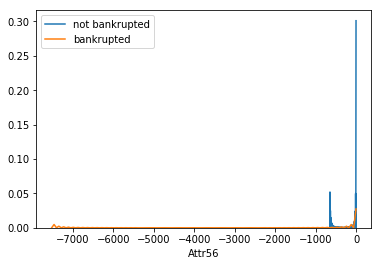

In [288]:
find(56,0,10,1,10)

## X57

Number of ? :  0
Length of the variable :  6854


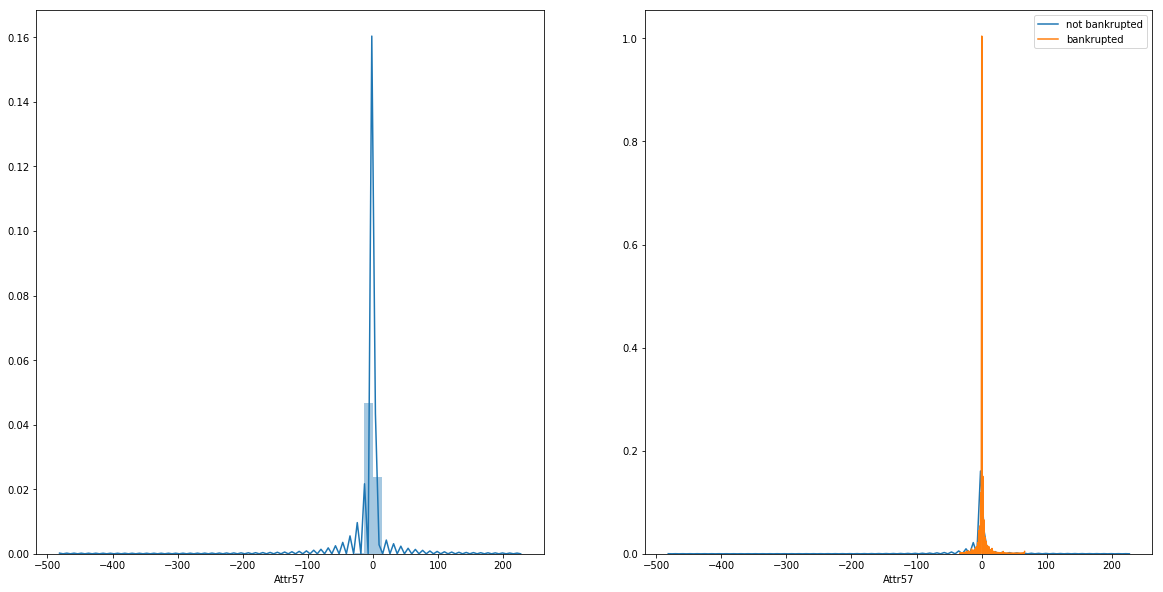

In [289]:
intt(57)

--------------FIND BEST I--------------
Best i :  0
Best ratio :  0.09441764300482426
Bankrupted :  137
Not Bankrupted :  1314
# of elements :  1451

------------FIND BEST I(ABS)-----------
Best i :  1
Best ratio :  0.04568764568764569
Bankrupted :  294
Not Bankrupted :  6141
# of elements :  6435


[FIND BEST I] ratio is higher(or valid)


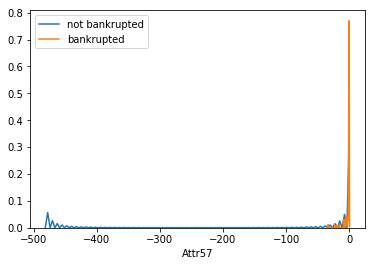

In [290]:
find(57, 0, 70, 1, 70)

## X58

Number of ? :  0
Length of the variable :  6845


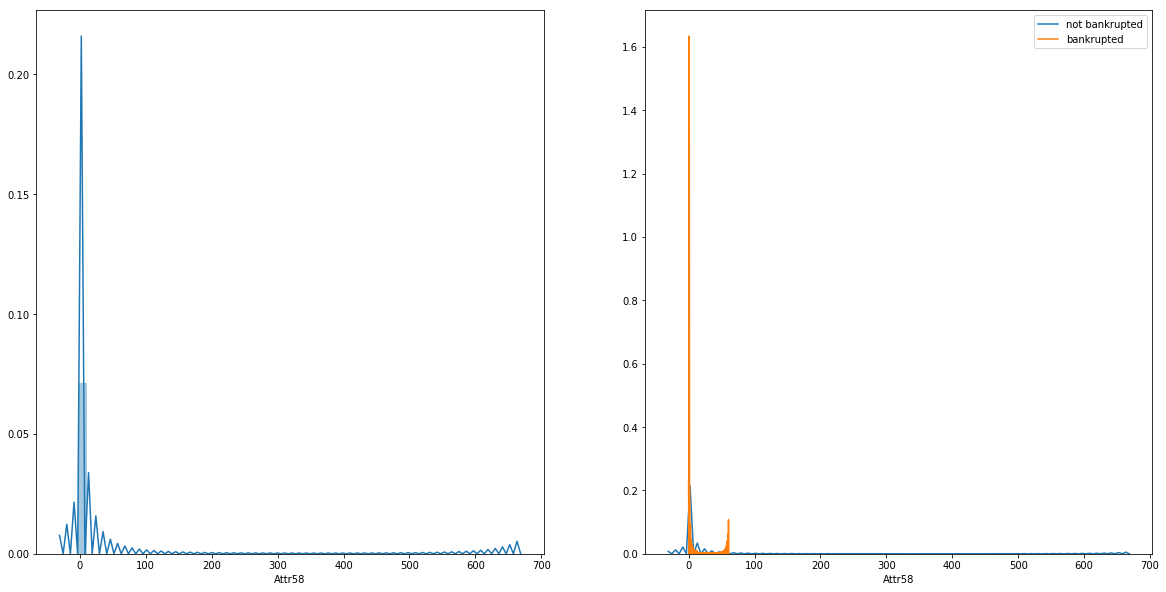

In [291]:
intt(58)

--------------FIND BEST I--------------
Best i :  13
Best ratio :  0.05267778753292362
Bankrupted :  360
Not Bankrupted :  6474
# of elements :  6834

------------FIND BEST I(ABS)-----------
Best i :  13
Best ratio :  0.05268549685350505
Bankrupted :  360
Not Bankrupted :  6473
# of elements :  6833


[FIND BEST I(ABS)] ratio is higher(or valid)


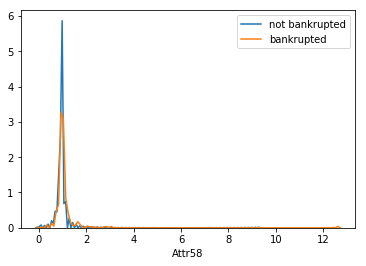

In [292]:
find(58, 0, 50, 0, 50)

## X59

Number of ? :  0
Length of the variable :  6854


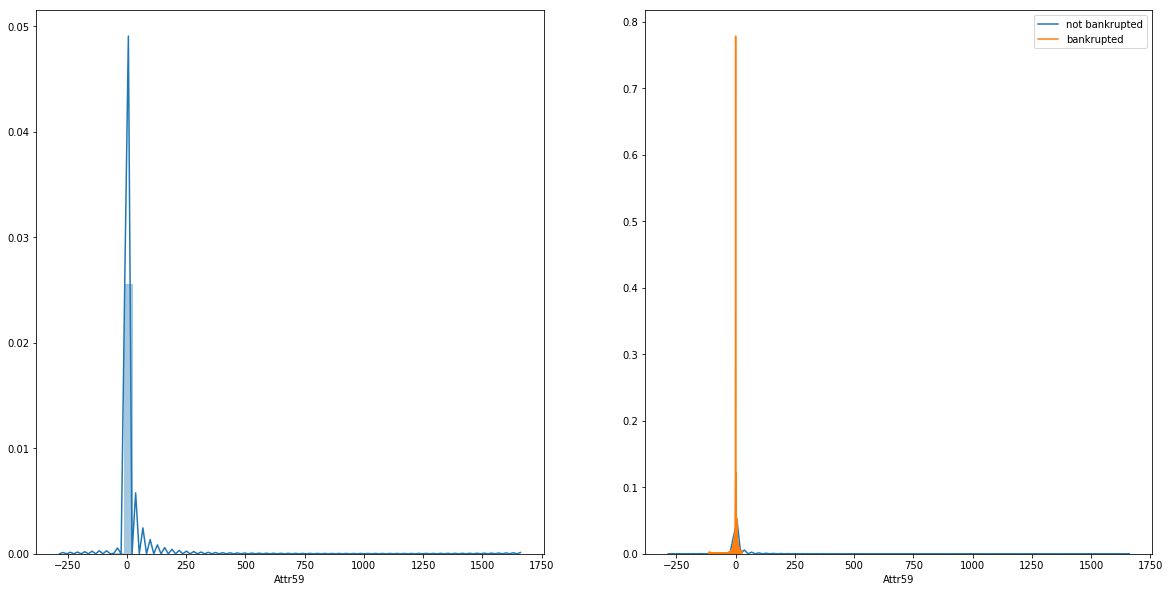

In [293]:
intt(59)

--------------FIND BEST I--------------
Best i :  0
Best ratio :  0.06170598911070781
Bankrupted :  204
Not Bankrupted :  3102
# of elements :  3306

------------FIND BEST I(ABS)-----------
Best i :  0
Best ratio :  0.058349451966473245
Bankrupted :  181
Not Bankrupted :  2921
# of elements :  3102


[FIND BEST I] ratio is higher(or valid)


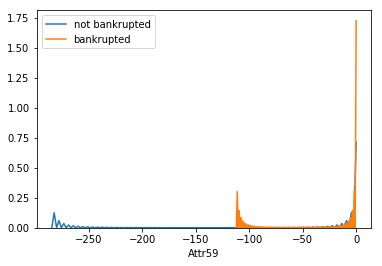

In [294]:
find(59, 0, 20, 0 , 20)

## X60

Number of ? :  0
Length of the variable :  6435


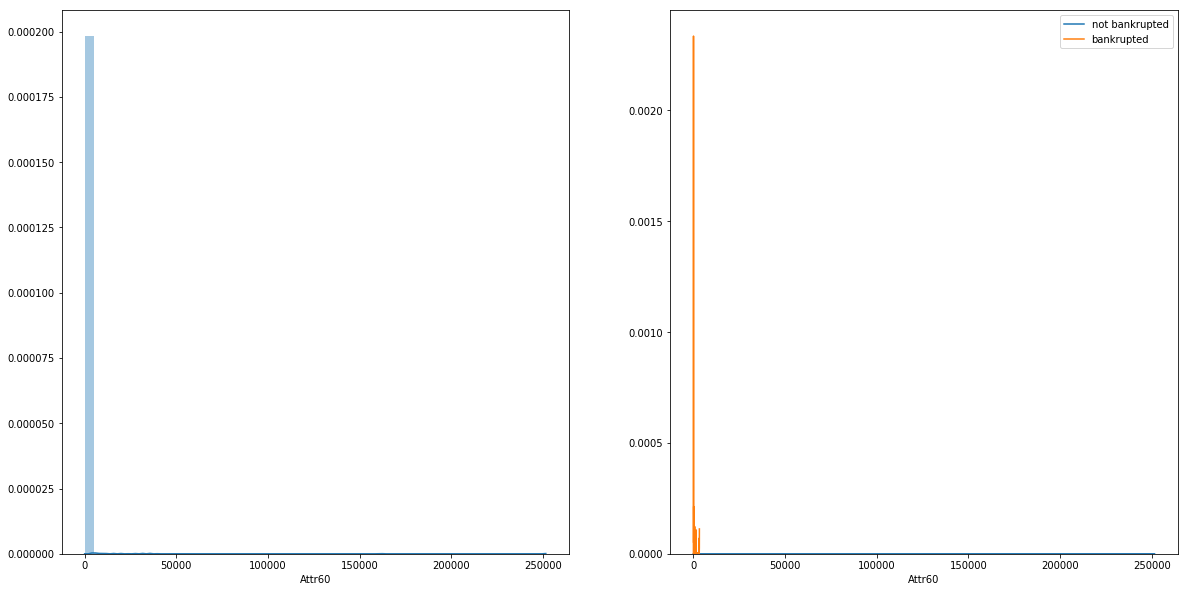

In [295]:
intt(60)

Best i :  1
Best ratio :  0.11475409836065574
Bankrupted :  7
Not Bankrupted :  54
# of elements :  61


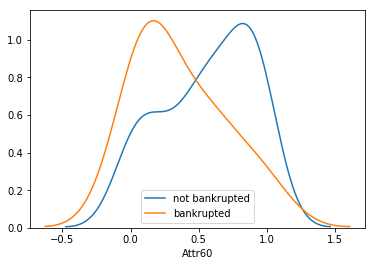

In [296]:
find_best_i(60, 0, 200)

## X61

Number of ? :  0
Length of the variable :  6835


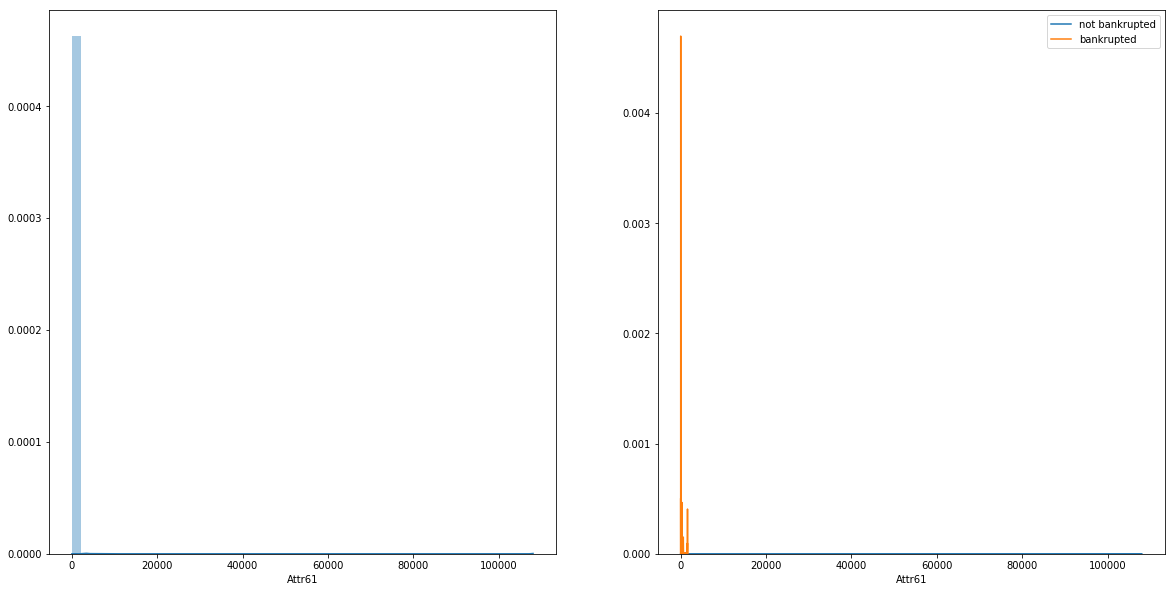

In [297]:
intt(61)

Best i :  2
Best ratio :  0.07669616519174041
Bankrupted :  26
Not Bankrupted :  313
# of elements :  339


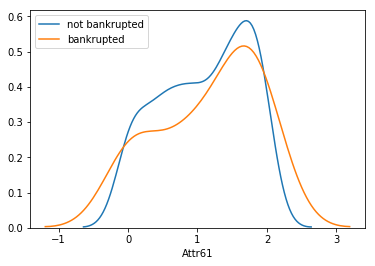

In [298]:
find_best_i(61, 0, 200)

## X62

Number of ? :  0
Length of the variable :  6841


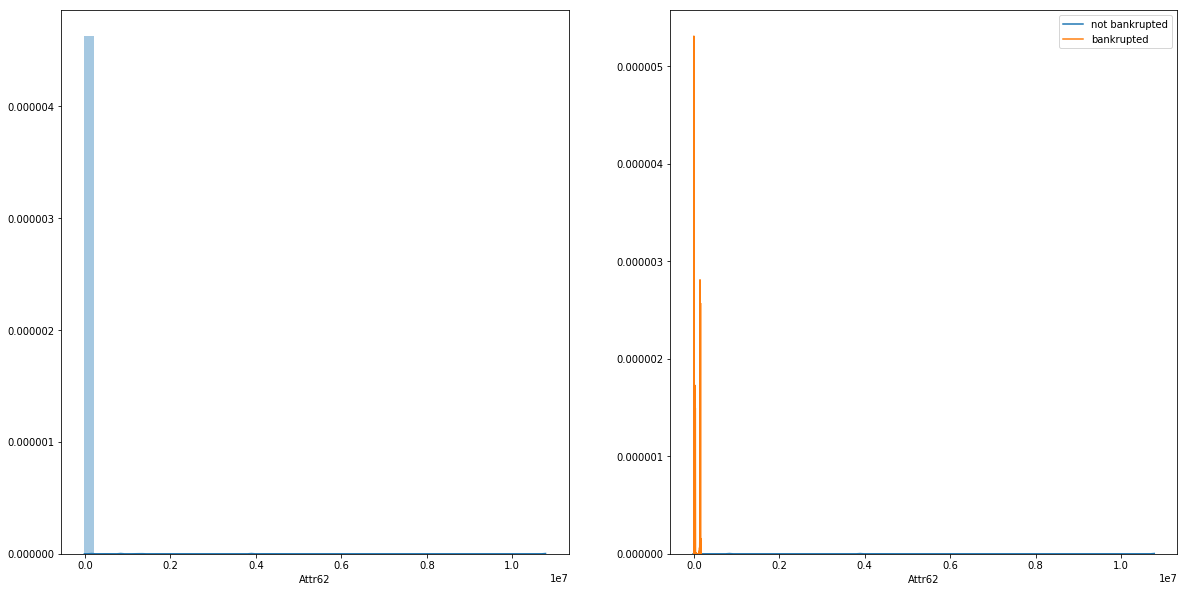

In [299]:
intt(62)

Best i :  9
Best ratio :  0.05128205128205128
Bankrupted :  8
Not Bankrupted :  148
# of elements :  156


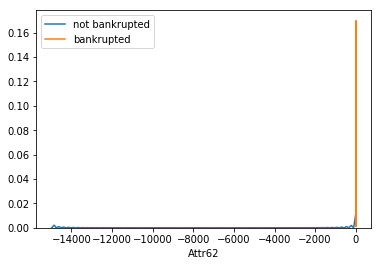

In [300]:
find_best_i(62, 0, 200)

## X63

Number of ? :  0
Length of the variable :  6827


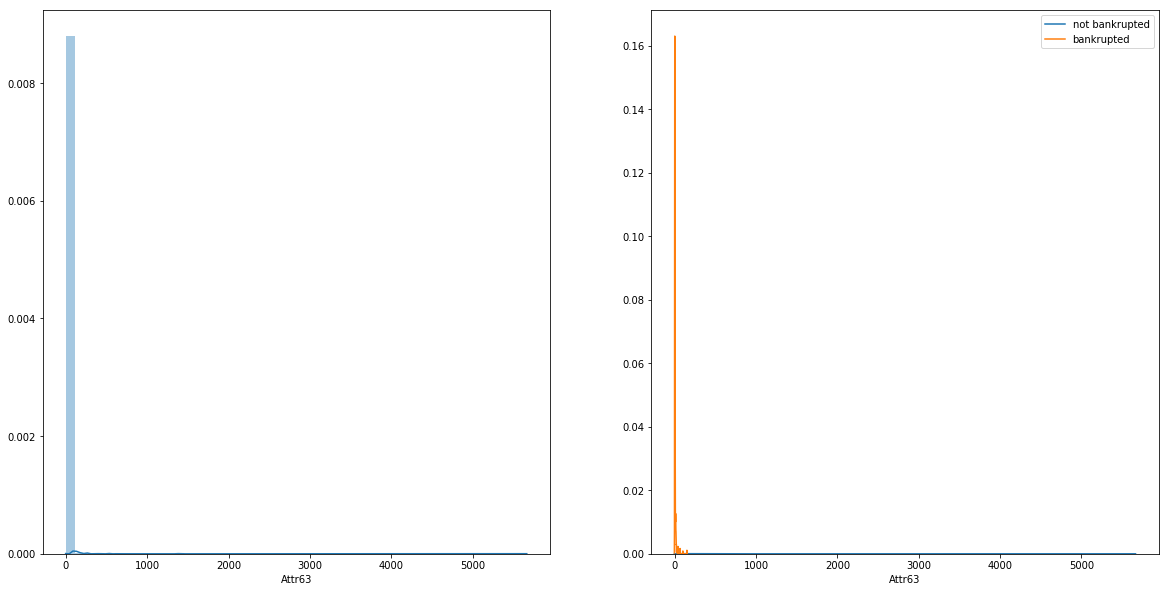

In [301]:
intt(63)

Best i :  1
Best ratio :  0.16
Bankrupted :  44
Not Bankrupted :  231
# of elements :  275


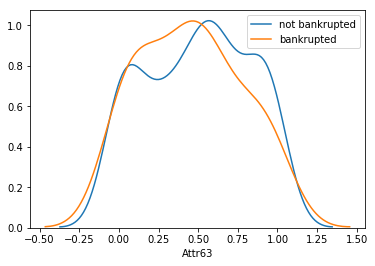

In [302]:
find_best_i(63, 0, 100)

## X64

Number of ? :  0
Length of the variable :  6693


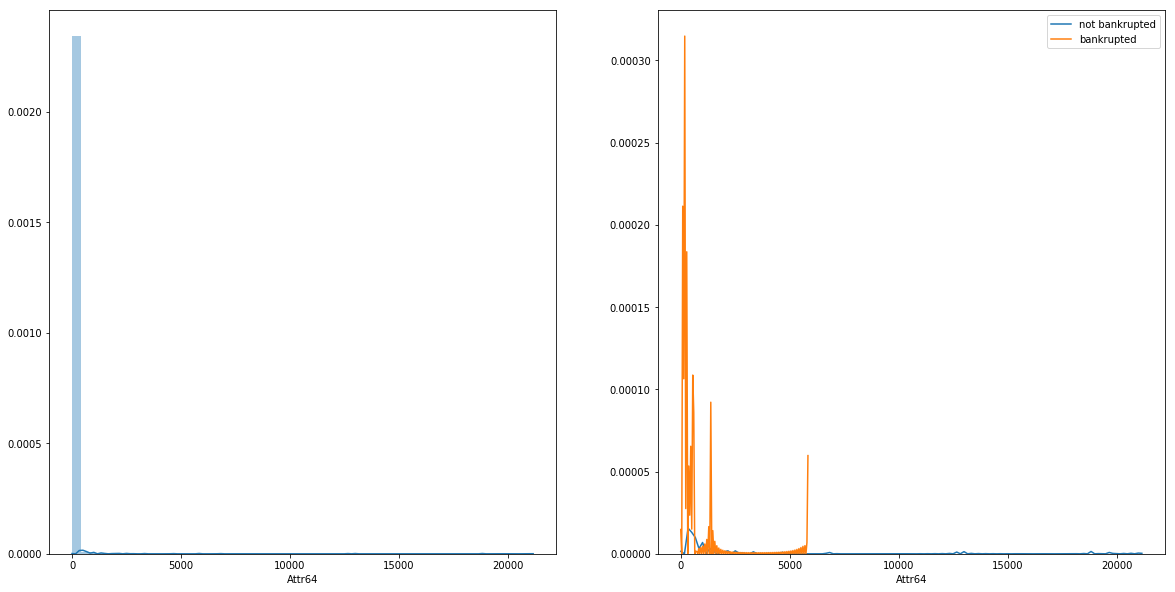

In [303]:
intt(64)

Best i :  2
Best ratio :  0.05612552806276403
Bankrupted :  93
Not Bankrupted :  1564
# of elements :  1657


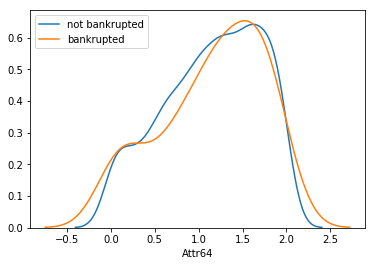

In [304]:
find_best_i(64, 0, 2300)

## 일단 분포는 끝!

- 분포를 보다보니 상관관계의 감을 잡기 위해선 공통된 outlier들을 살펴보는 것이 상당히 도움이 되었다.
- 처음에는 하나씩 분석하면서 하려고 했지만 너무 시간이 많이 걸려서 점점 간단해졌다. ㅋㅋㅋㅋ ㅠㅜ (그래서 점점 함수로 합쳐진다..)
- find, find_best_i의 문제는 값이 어떤 지정 i 보다 작은 경우만 고려했고, range함수를 썼기 때문에 i가 non-negative 였다는 점이다.
- i가 음수일 때 더 좋은 결과가 나올 수 도 있고, 값들이 i 보다 큰 경우를 고려하는게 TP(True Positive)를 고려하는 데 더 도움이 될 수도 있을 것 같다.
- 또 Best ratio가 무조건 높다고 좋아할 수만 없는 것은 표본이 작을 수도 있기 때문이다.

## outlier들을 보자

In [305]:
outliers = []

for i in range(1, data.shape[1]):
    outliers.append(list(sort(i)[-3:].index))
    outliers.append(list(sort(i)[:3].index))

In [306]:
len(outliers) #64*2 =128

128

In [307]:
from itertools import chain

outliers_idx = list(chain(*outliers))
len(outliers_idx)#128*3

384

In [308]:
outliers_idx_sr = pd.Series(outliers_idx)
outliers_idx_sr.head()

0    5652
1    3982
2     503
3     423
4    3802
dtype: int64

In [309]:
outliers_idx_sr.value_counts().head(10)

5935    19
4994    15
1593    13
5810    12
4679    12
2555     9
1458     9
5381     9
2099     9
3802     8
dtype: int64

In [310]:
def find_attr_num(outlier_index):
    idx_list = list(outliers_idx_sr[outliers_idx_sr==outlier_index].index)
    attr_num_list = [x // 6 for x in idx_list]
    return attr_num_list

특정 회사번호(ex. 5935)가 어느 변수에 속하는지 궁금하면 이 함수를 돌리면 된다.

In [311]:
find_attr_num(5935)

[1, 2, 7, 9, 12, 18, 22, 29, 30, 37, 38, 41, 42, 43, 48, 50, 55, 57, 61]

5935는 Attr 1, 2, 7, 9, 12, 18, 22, 29, 30, 37, 38, 41, 42, 43, 48, 50, 55, 57, 61 에 속한다.